## ***Data Science Engineering Methods***
## ***Assignment 1 – ML Data Cleaning and Feature Selection***

Question:

ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.


Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013)Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## **Abstract:**

The focus of this assignment is to conduct a comprehensive analysis of the "Health & Development Indicators: Global Insights" dataset. To accomplish this, I will start with data preprocessing tasks such as data cleaning, handling missing values, and encoding categorical variables. After this, I will conduct exploratory data analysis to identify patterns, trends and relationships within the dataset. This will involve the use of visualizations, summary statistics and hypothesis testing to gain a better understanding of the data's characteristics.

In addition to these tasks, I will also apply advanced analytical techniques to answer specific research questions related to health and development. Depending on the research objectives, these techniques may include regression analysis, clustering, classification, and time series analysis.

## **Dataset Analysis**

In [70]:
#importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats


In [71]:
#reading the dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/akshitapathania7/ML-Data-Cleaning-and-Feature-Selection/main/Life_Expectancy_Data.csv')

In [72]:
#displaying the dataset
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


###**Column Descriptions:**
1. **Country**: The name of the country.
2. **Year**: The year of data recording.
3. **Status**: The status of the country, either developing or developed
4. **Life Expectancy**: The average number of years a newborn, person at different age ranges, or the entire population is expected to live.
5. **Adult Mortality**: Probability of dying between 15 and 60 years per 1000 population.
6. **Infant Deaths**: Number of infant deaths per 1000 live births.
7. **Alcohol**: Alcohol consumption per capita (in liters of pure alcohol).
8. **Percentage Expenditure**: Expenditure on health as a percentage of total government spending or GDP.
9. **Hepatitis B**: Hepatitis B immunization coverage among 1-year-olds (percentage).
10. **Measles**: Measles immunization coverage among 1-year-olds (percentage).
11. **BMI**: The Average Body Mass indices of people in different countries (kg/m^2).
12. **Under-five deaths**: Number of children that have died at ages less than 5 years old.
13. **Polio**: Polio immunization coverage in each country (percentage).
14. **Total Expenditure**: Total health expenditure per capita.
15. **Diphtheria**: Diphtheria immunization coverage in each country (percentage).
16. **HIV/AIDS**: HIV/AIDS Death rate per 1000 population.
17. **GDP**: Gross Domestic Product per capita.
18. **Population**: The total Population increased in every country over the years.
19. **Thinness 1-19 years**: Prevalence of thinness of children between 1-19 years old (percentage).
20. **Thinness 5-9 years**: Prevalence of thinness of children between 5-9 years old (percentage).
21. **Income composition of resources**: Human Development Index income composition (range between 0-1).
22. **Schooling**: Number of years of schooling.



**Now we start analysing the dataset**

In [73]:
#printing the number of observations and variables in the dataset
print(f"Dataset has {df.shape[0]} observations with {df.shape[1]} variables.")

Dataset has 1649 observations with 22 variables.


### **1. What are the data types? (Only numeric and categorical)**



In [74]:
#exploring the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

**This Life Expectancy Dataset has 2 Categorical features, and 20 Continuous features (8 Discrete quantitative features, and 11 Continuous quantitative features)**

**Also we can see a few discrepancies in the names of the columns, so let us change that into something more easily readable.**

In [75]:
df = df.rename(columns={'Life expectancy ': 'Life expectancy'})
df = df.rename(columns={'Measles ': 'Measles'})
df = df.rename(columns={'infant deaths': 'Infant deaths'})
df = df.rename(columns={'percentage expenditure': 'Percentage expenditure'})
df = df.rename(columns={' BMI ': 'BMI'})
df = df.rename(columns={'under-five deaths ': 'Under-five deaths'})
df = df.rename(columns={'Diphtheria ': 'Diphtheria'})
df = df.rename(columns={' HIV/AIDS': 'HIV/AIDS'})
df = df.rename(columns={' thinness  1-19 years': 'Thinness 1-19 years'})
df = df.rename(columns={' thinness 5-9 years': 'Thinness 5-9 years'})

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   Infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five deaths                1649 non-null   int64  
 12  Polio               

Now we can easily read the columns.

### **2. Are there missing values?**

In [77]:
#checking for missing values
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [78]:
#checking NaN values in dataset
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

There are no missing values or NaN values in this dataset, hence we do not need to apply methods to fill in the vacancy.

## The target variable assumed in this dataset is the **Life expectancy** column.

### **3.  What are the likely distributions of the numeric variables?**

In [79]:
#gives us the list of numerical columns and categorical columns
numerical_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",numerical_col)

categorical_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",categorical_col)

Numerical columns: 
 Index(['Year', 'Life expectancy', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


In [80]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['Country', 'Status']

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [81]:
df.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,66.193451,2007.840509,0.853244,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,...,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,38.892006,4.087711,0.353969,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,...,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,0.000000,2000.000000,0.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,...,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,32.000000,2005.000000,1.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,...,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,67.000000,2008.000000,1.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,...,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,100.000000,2011.000000,1.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,...,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,132.000000,2015.000000,1.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,...,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


We can again confirm that we have 2 categorical columns and 20 numerical columns.

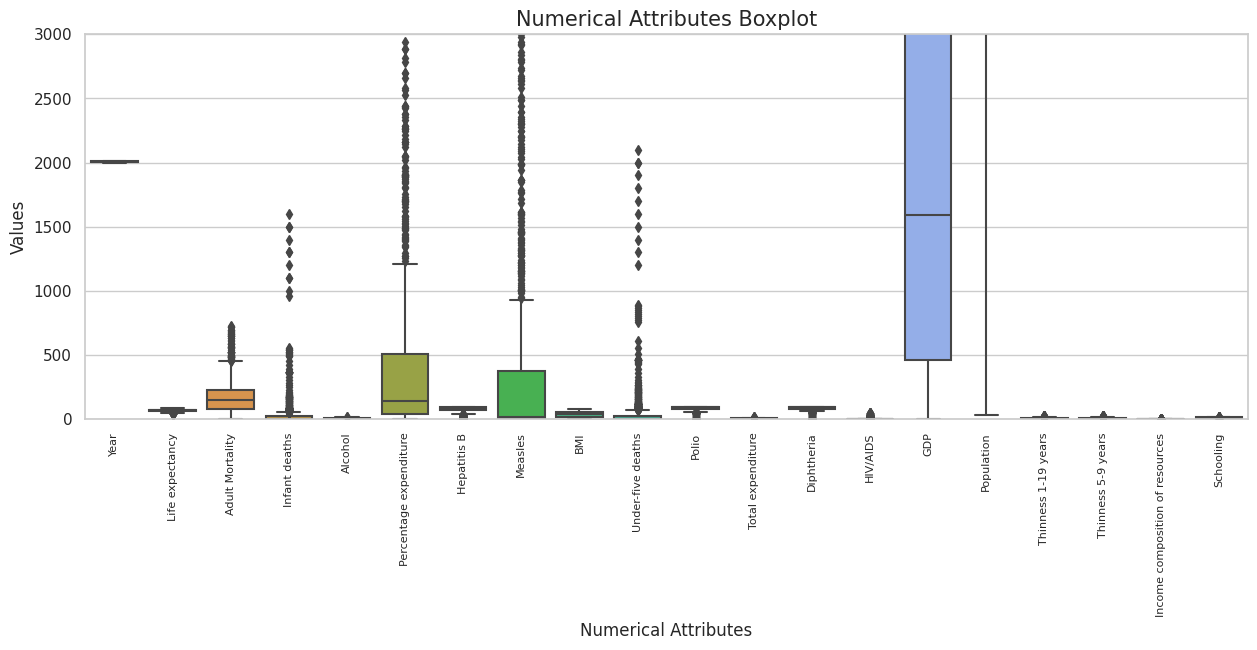

In [82]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[numerical_col])
plt.ylim(0, 3000) # set y-axis range

labels = ['Year', 'Life expectancy', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
plt.xticks(range(len(labels)), labels, rotation=90, fontsize=8)


plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

With the boxplot of the numerical values given above, it is extremely clear that we have a few outliers.

But due to the ranges in the values of all these numerical columns it is a bit difficult to analyze all the columns in the boxplot.

Hence, we will analyze them by segregating them into groups and then confirm the possibility of them having outliers.


### **We start with a group of numerical columns that are related to the deaths that occurred.**

In [83]:
df[['Infant deaths','Under-five deaths','HIV/AIDS']].describe().round(3)

,Infant deaths,Under-five deaths,HIV/AIDS
count,1649.000,1649.000,1649.000
mean,32.553,44.220,1.984
std,120.847,162.898,6.032
min,0.000,0.000,0.100
25%,1.000,1.000,0.100
50%,3.000,4.000,0.100
75%,22.000,29.000,0.700
max,1600.000,2100.000,50.600


**The above description tells us the count, mean, standard deviation, minimum value, maximum value, and percentiles for deaths due to various reasons.**

>**Infant deaths:**
This shows us that the average is around 32.5 with the standard deviation being 120.8, which is higher, hence the values are likely to be spread out away from the mean.
It also shows us that the maximum values of deaths are distributed between 0-22 with a maximum value of 1600.

> **Under-five Deaths:**
The mean here is about 44.2 with a standard deviation of 162.8 which is, again, higher with values being spread out. It also shows us the range of values distributed between 0-29 with a maximum value of 2100, which is extremely terrible.

> **HIV/AIDS deaths:**
The average is around 1.9, which is lower than the other two, with the standard deviation being 6, which is a little higher, hence the values are likely to be spread out away from the mean.
The maximum number of data points is distributed between 0.1 and 0.7 with a maximum value of 50.



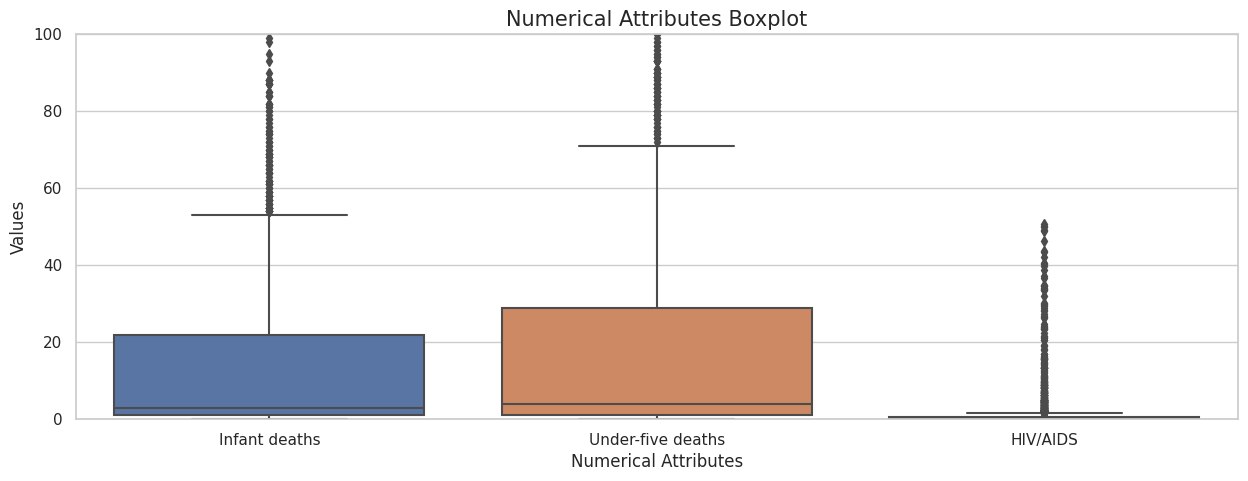

In [84]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[['Infant deaths','Under-five deaths','HIV/AIDS']])
plt.ylim(0, 100) # set y-axis range

plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

With the first group of numerical values, we can clearly tell that there are definitely outliers present in these columns.

### **We will now use the describe function on numerical columns that have immunization coverages over the different countries.**

In [85]:
df[['Hepatitis B','Measles','Polio','Diphtheria']].describe().round(3)

,Hepatitis B,Measles,Polio,Diphtheria
count,1649.000,1649.000,1649.000,1649.000
mean,79.218,2224.494,83.565,84.155
std,25.605,10085.802,22.451,21.579
min,2.000,0.000,3.000,2.000
25%,74.000,0.000,81.000,82.000
50%,89.000,15.000,93.000,92.000
75%,96.000,373.000,97.000,97.000
max,99.000,131441.000,99.000,99.000


**The above description tells us the count, mean, standard deviation, minimum value, maximum value, and percentiles for immunization coverage of different diseases.**

> **Hepatitis B:** This shows us that the average is around 79.2 with the standard deviation being 25.6, which is lower, hence the values are likely to be inclose proximity of the mean. It also shows us that the maximum data points are distributed between 2 and 96 with a maximum value of 99.

> **Measles:** The mean here is about 2224.4 with a standard deviation of 10085.8 which is higher with data points being spread out away from the mean. It also shows us the range of data points distributed between 0 and 373 with a maximum value of 131441.

> **Polio:** The average is around 84.1, with the standard deviation of 22.4, which is lower, hence the data points are likely to be close to the mean. The maximum number of data points is distributed between 3 and 97 with a maximum value of 99.

> **Diphtheria:** The mean is 83.5, with the standard deviation being 21.5, which is lower, hence the data points are likely to be in proximity to the mean. The maximum number of data points is distributed between 2 and 97 with a maximum value of 99.

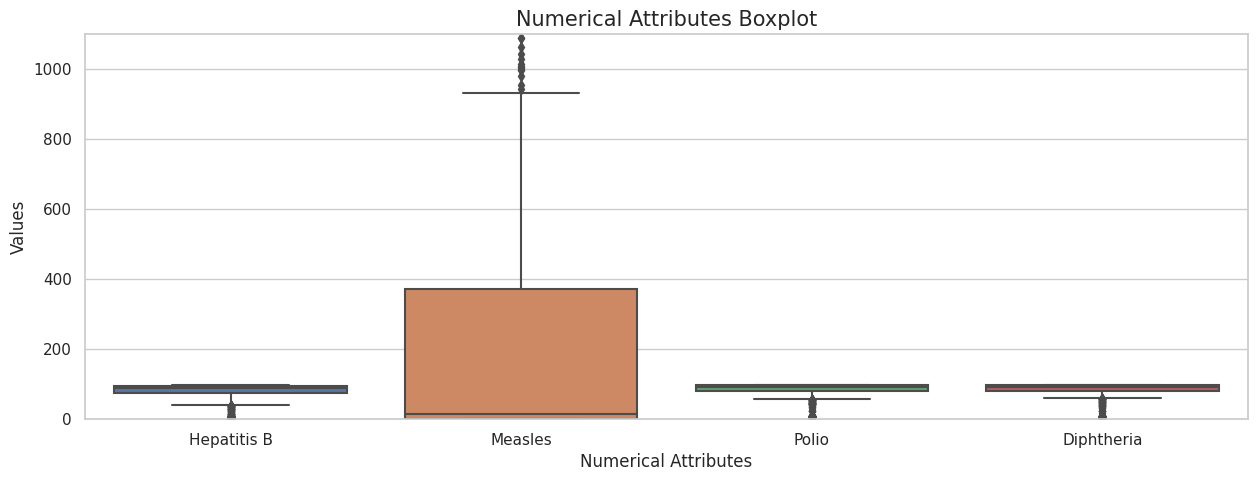

In [86]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[['Hepatitis B','Measles','Polio','Diphtheria']])
plt.ylim(0, 1100) # set y-axis range

plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

Measles seems like the only one in this group of numerical columns that has outliers.

### **We will now describe a few columns that have a somewhat similar pattern and value range for easy visualization.**

In [87]:
df[['Life expectancy',
       'Alcohol', 'Total expenditure', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']].describe().round(3)

,Life expectancy,Alcohol,Total expenditure,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000,1649.000
mean,69.302,4.533,5.956,4.851,4.908,0.632,12.120
std,8.797,4.029,2.299,4.599,4.654,0.183,2.795
min,44.000,0.010,0.740,0.100,0.100,0.000,4.200
25%,64.400,0.810,4.410,1.600,1.700,0.509,10.300
50%,71.700,3.790,5.840,3.000,3.200,0.673,12.300
75%,75.000,7.340,7.470,7.100,7.100,0.751,14.000
max,89.000,17.870,14.390,27.200,28.200,0.936,20.700


There are a few patterns we can notice among all these above deductions that all of these columns have standard deviations lower than their means, hence all have data points closer to their mean.


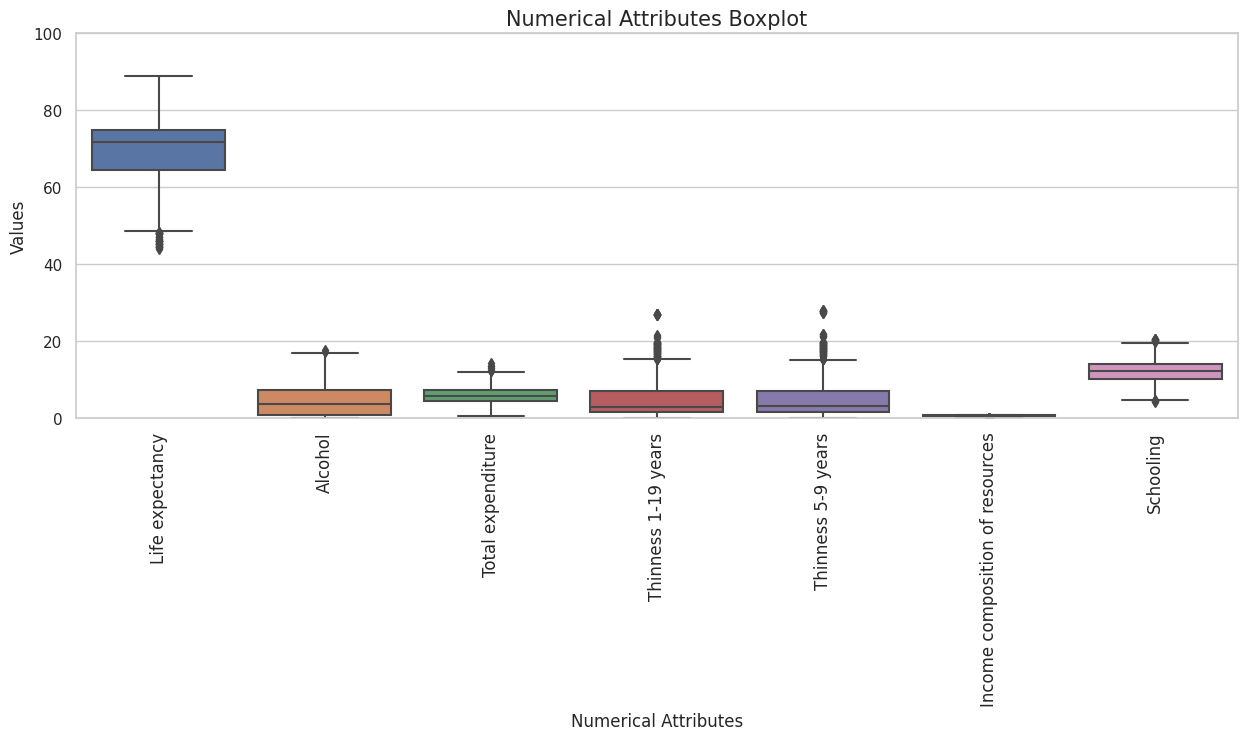

In [88]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[['Life expectancy',
       'Alcohol', 'Total expenditure', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']])
plt.ylim(0, 100) # set y-axis range
labels = ['Life expectancy',
       'Alcohol','Total expenditure', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
plt.xticks(range(len(labels)), labels, rotation=90, fontsize=12)

plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

'Alcohol', 'Total Expenditure', 'Thinness 1-19 years', 'Thinness 5-9 years', and 'Schooling' are the ones in this group of numerical columns with outliers.

### **For the last group, we have, again similar value ranges for easy visualization.**

In [89]:
df[['Year', 'Adult Mortality', 'Percentage expenditure',
       'GDP', 'Population', ]].describe().round(3)

,Year,Adult Mortality,Percentage expenditure,GDP,Population
count,1649.000,1649.000,1649.000,1649.000,1.649000e+03
mean,2007.841,168.215,698.974,5566.032,1.465363e+07
std,4.088,125.310,1759.229,11475.900,7.046039e+07
min,2000.000,1.000,0.000,1.681,3.400000e+01
25%,2005.000,77.000,37.439,462.150,1.918970e+05
50%,2008.000,148.000,145.102,1592.572,1.419631e+06
75%,2011.000,227.000,509.390,4718.513,7.658972e+06
max,2015.000,723.000,18961.349,119172.742,1.293859e+09


Here we notice that these columns have a comparatively higher mean, than the previously discussed columns.

Except for the 'Year' and 'Adult Morality' columns, all the other columns have a higher standard deviation, meaning the data points for those columns are spread out away from their mean.

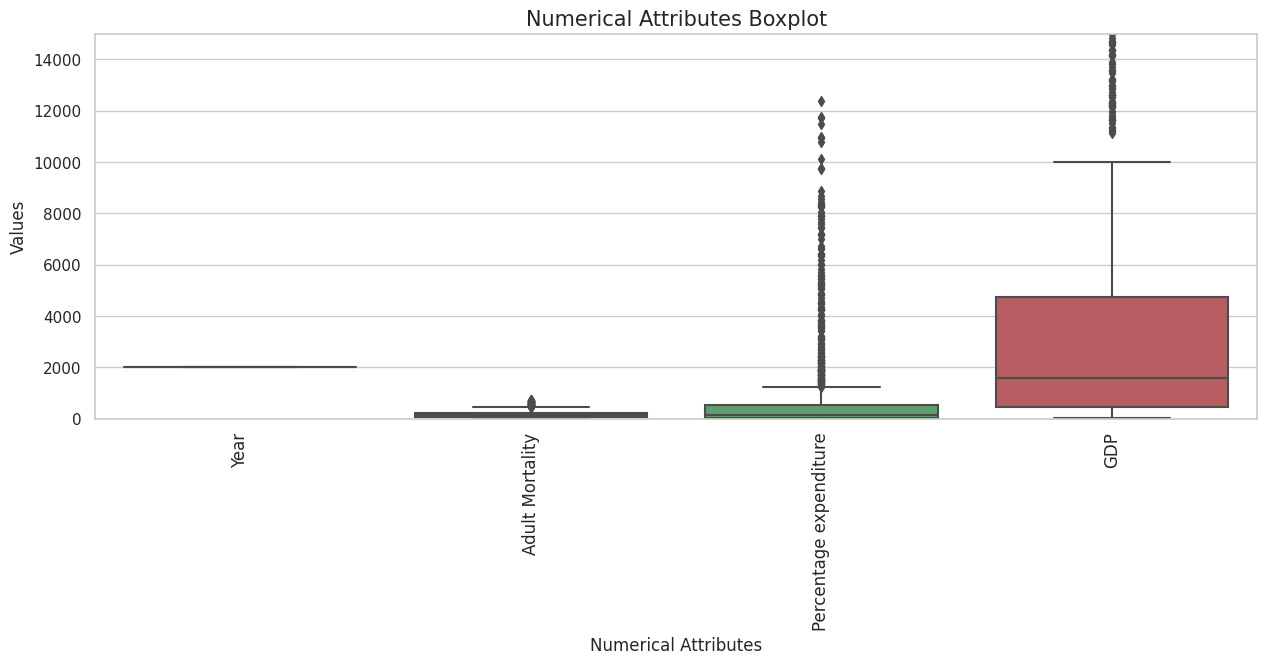

In [90]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[['Year','Adult Mortality','Percentage expenditure','GDP']])
plt.ylim(0, 15000) # set y-axis range
labels = ['Year','Adult Mortality','Percentage expenditure','GDP']
plt.xticks(range(len(labels)), labels, rotation=90, fontsize=12)

plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

The 'Year' has values ranging from 2000 to 2015, hence the boxplot is not visible in the above plot.

Furthermore, 'Adult Mortality', 'Percentage expenditure', and 'GDP' seem to have outliers.

We have the boxplot for the 'Population' column below, as it had extremely high values.

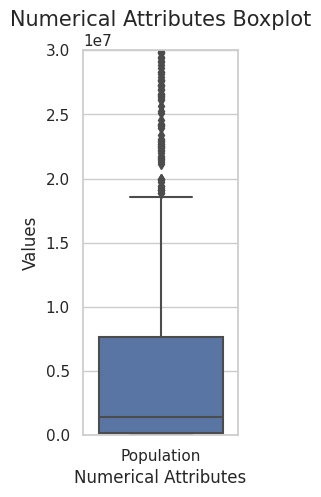

In [91]:
plt.figure(figsize=(2,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[['Population']])
plt.ylim(0, 30000000) # set y-axis range


plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

In the above, the 'Population' column has outliers.

<ipython-input-92-23278b410fc4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


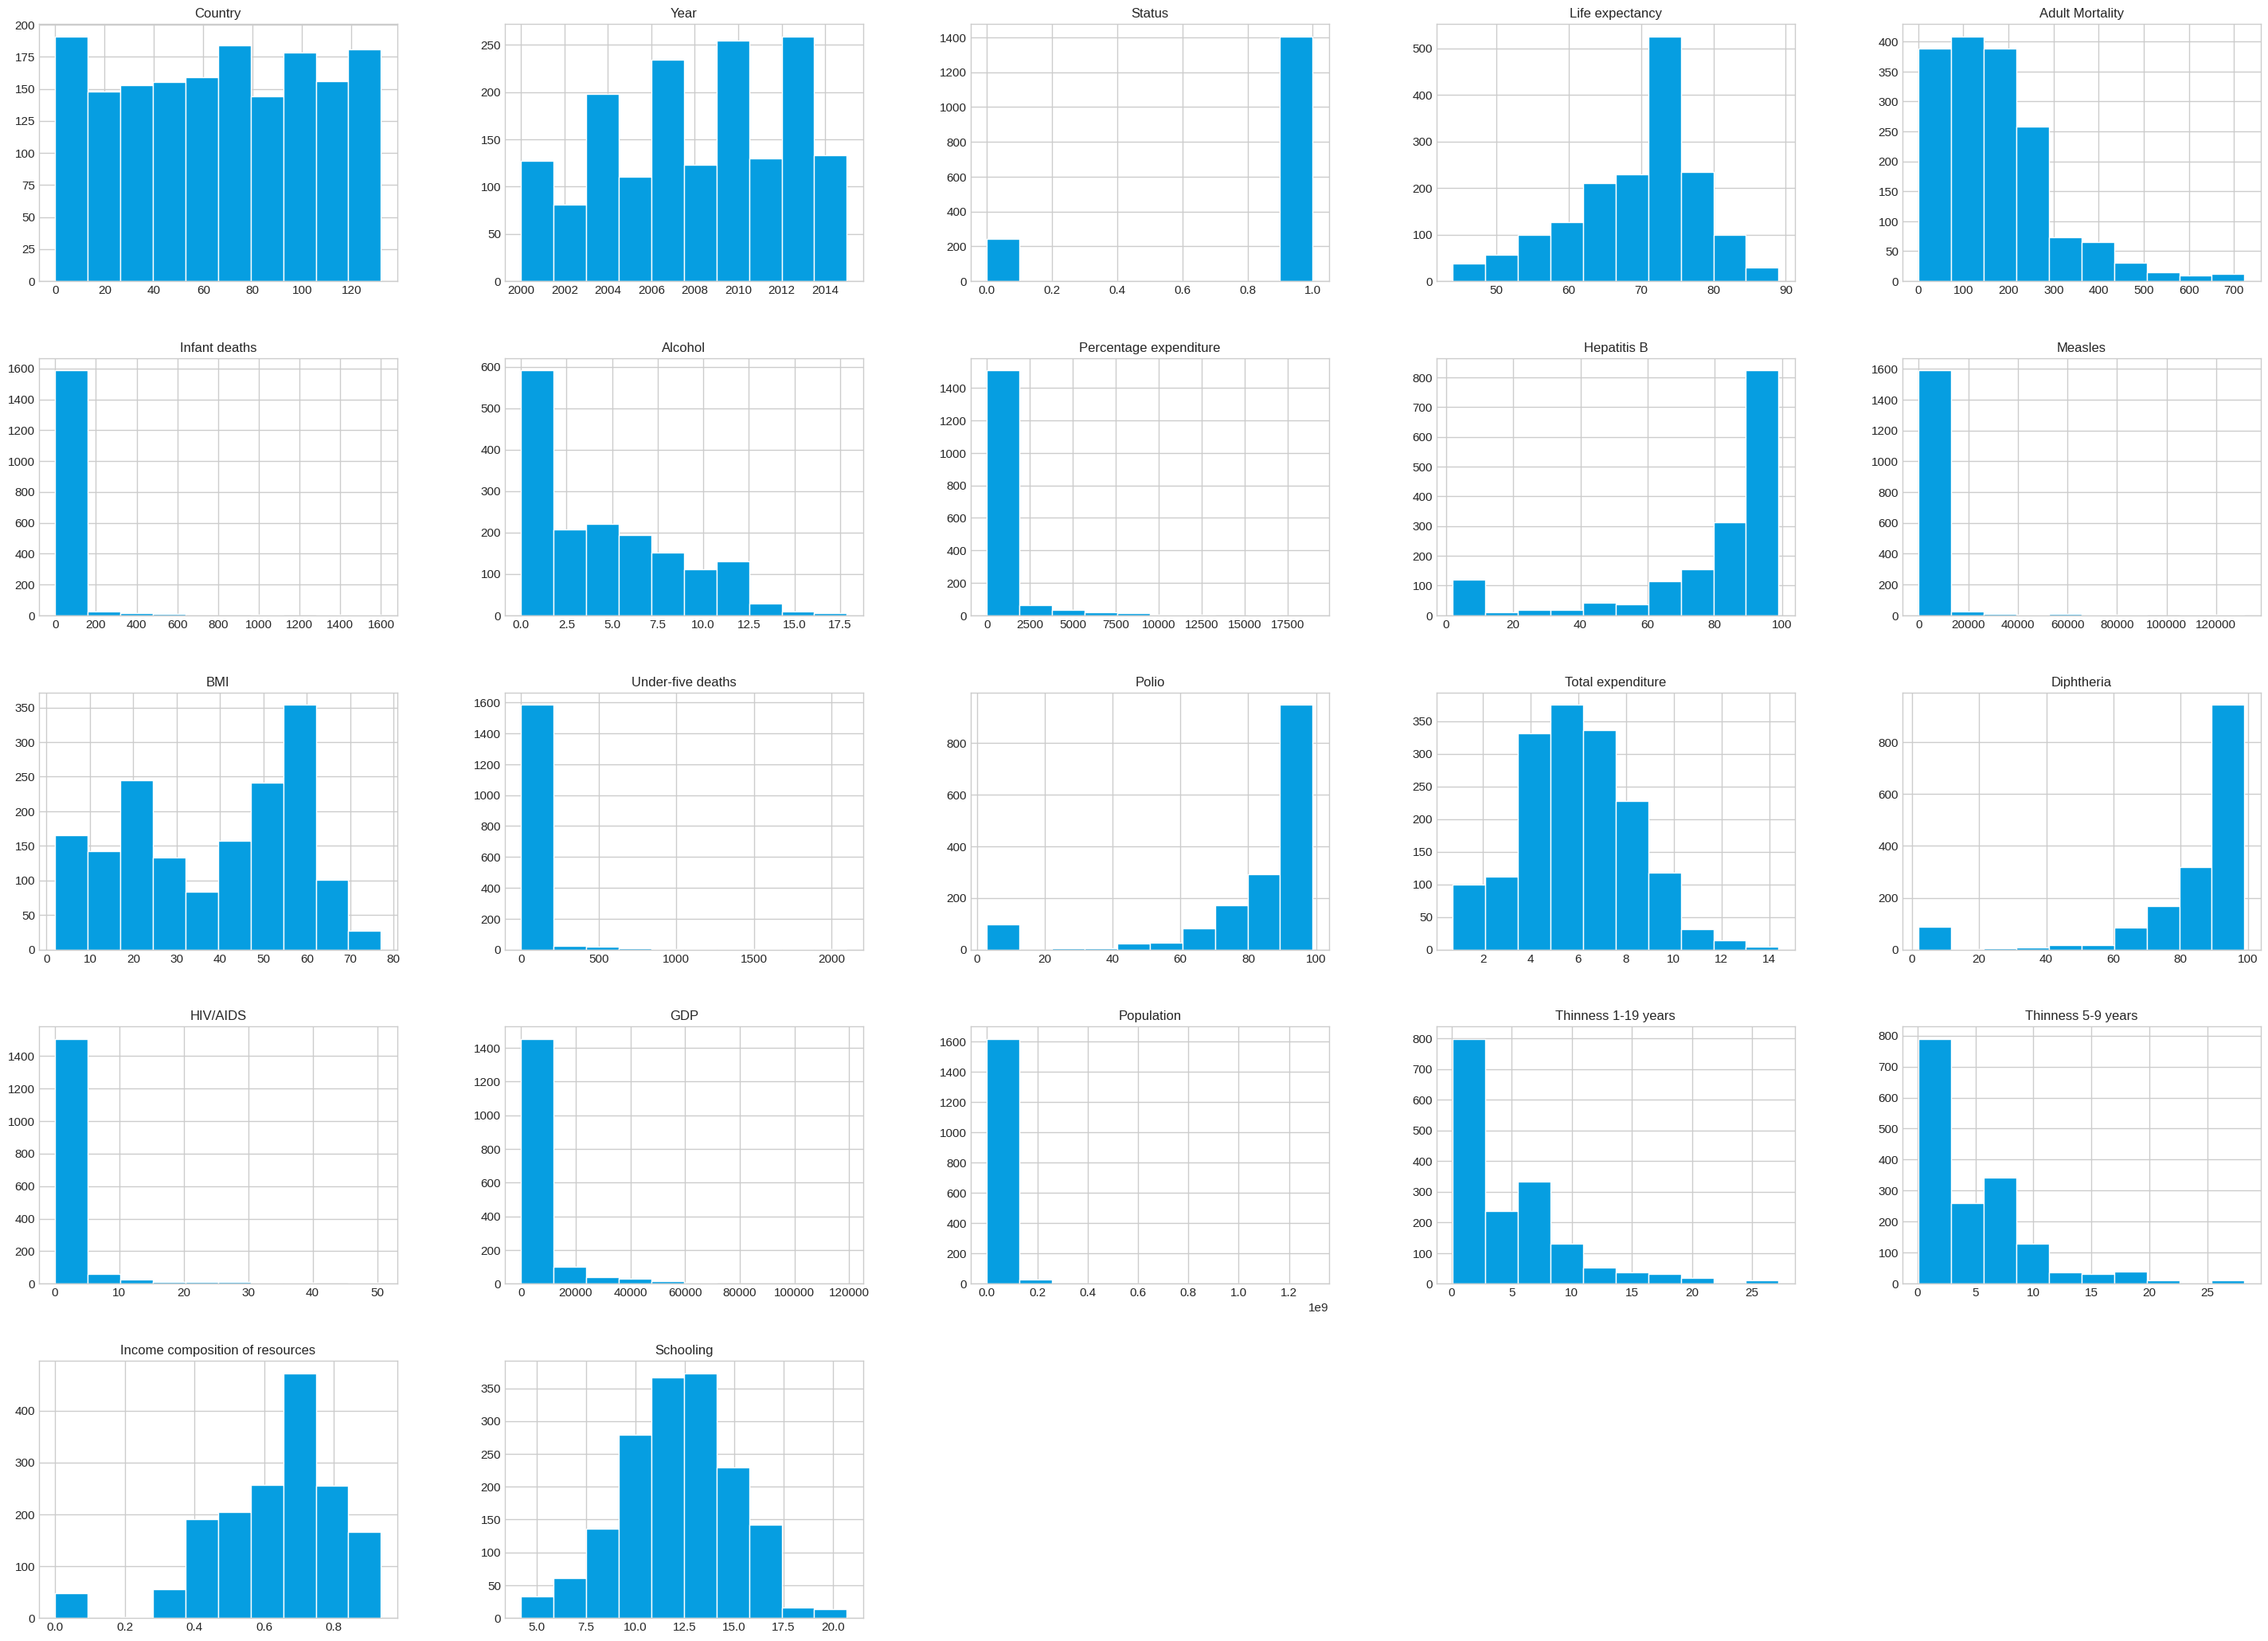

In [92]:
#Generating a grid of histograms, one for each numerical column in the DataFrame
plt.style.use('seaborn-whitegrid')
df.hist(bins=10, figsize=(36,26), color='#069EE1')
plt.show();


### **Using the Q-Q plot we will get a clear idea of the distribution of the Numerical columns**  

<Figure size 400x300 with 0 Axes>

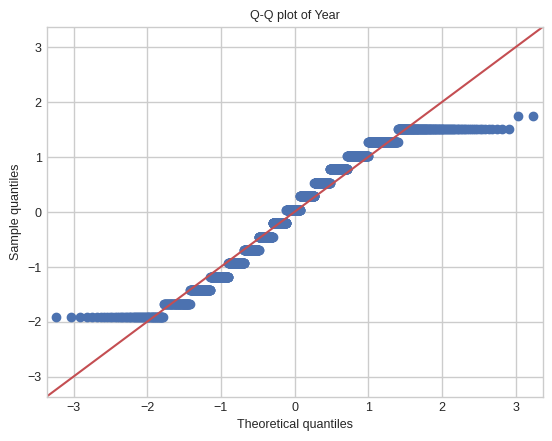

<Figure size 400x300 with 0 Axes>

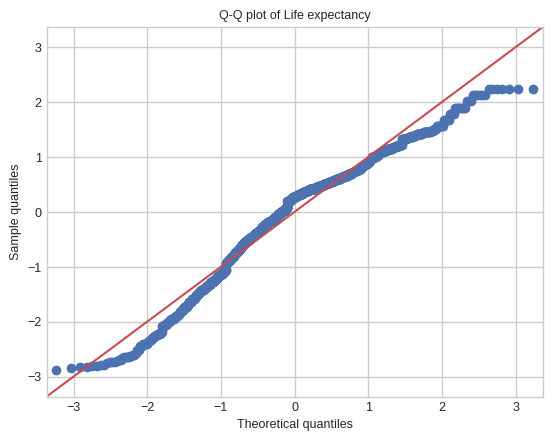

<Figure size 400x300 with 0 Axes>

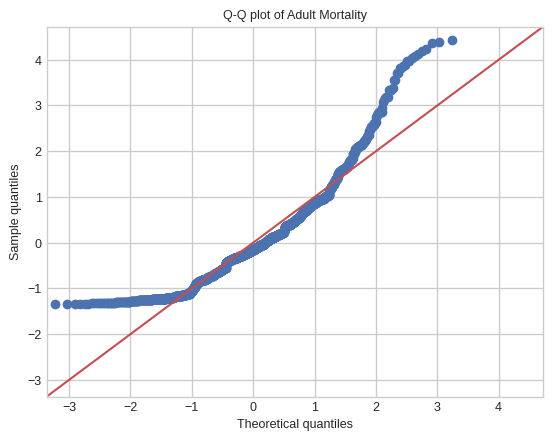

<Figure size 400x300 with 0 Axes>

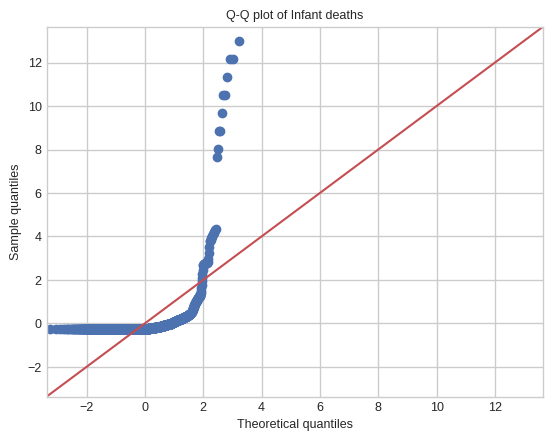

<Figure size 400x300 with 0 Axes>

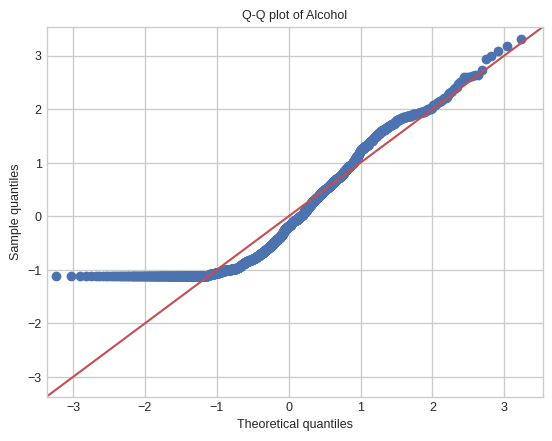

<Figure size 400x300 with 0 Axes>

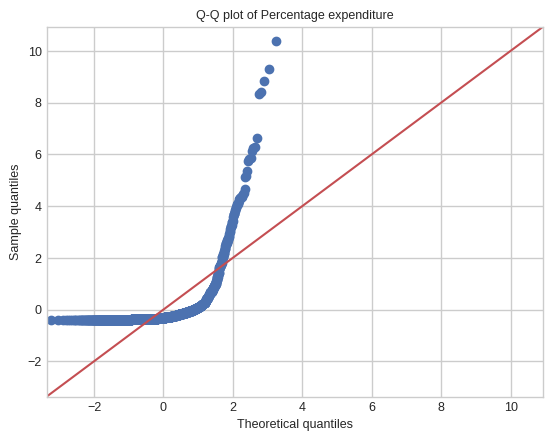

<Figure size 400x300 with 0 Axes>

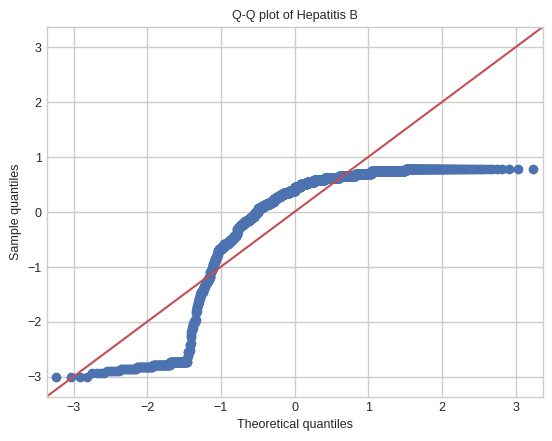

<Figure size 400x300 with 0 Axes>

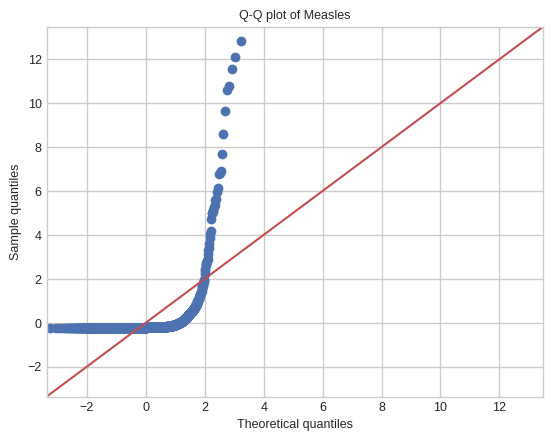

<Figure size 400x300 with 0 Axes>

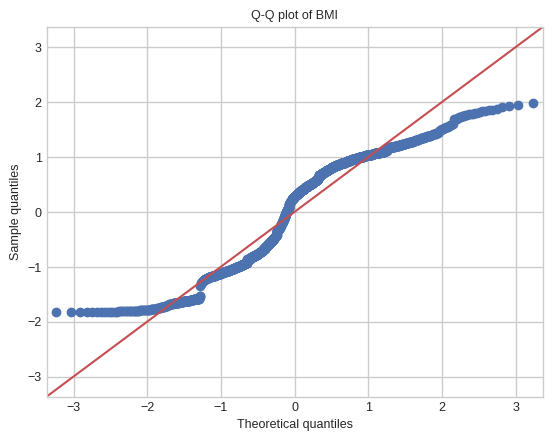

<Figure size 400x300 with 0 Axes>

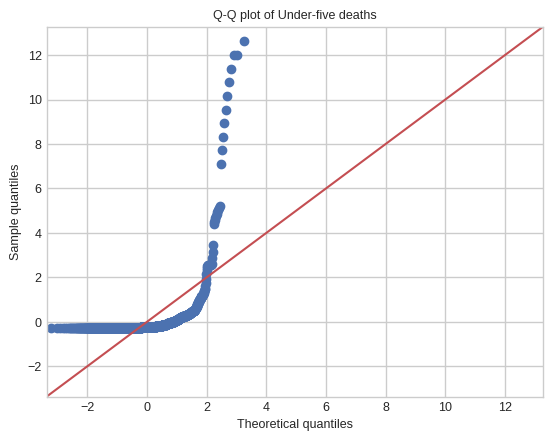

<Figure size 400x300 with 0 Axes>

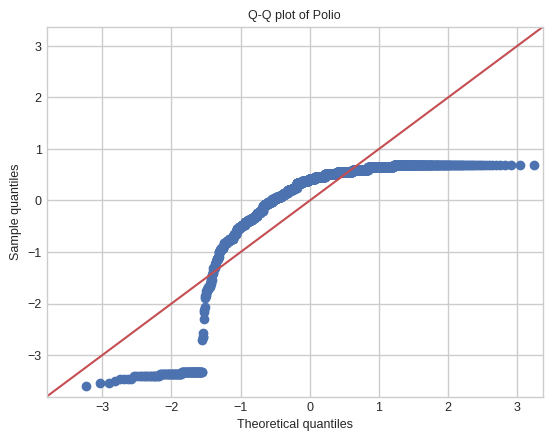

<Figure size 400x300 with 0 Axes>

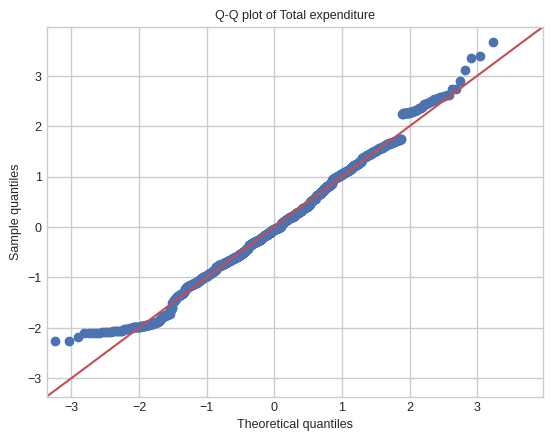

<Figure size 400x300 with 0 Axes>

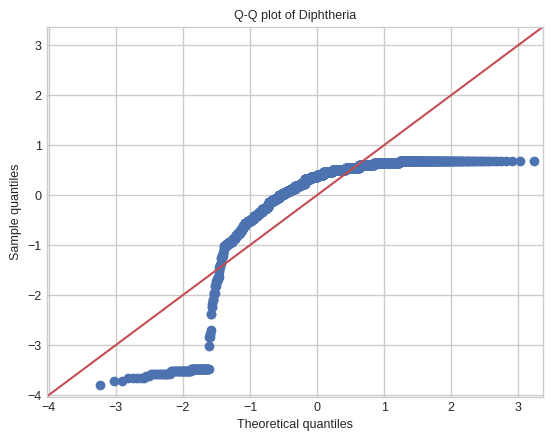

<Figure size 400x300 with 0 Axes>

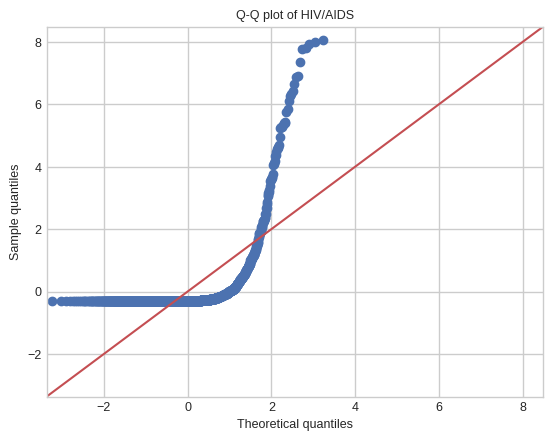

<Figure size 400x300 with 0 Axes>

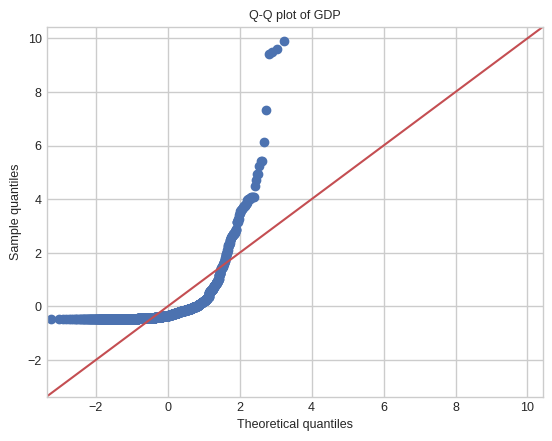

<Figure size 400x300 with 0 Axes>

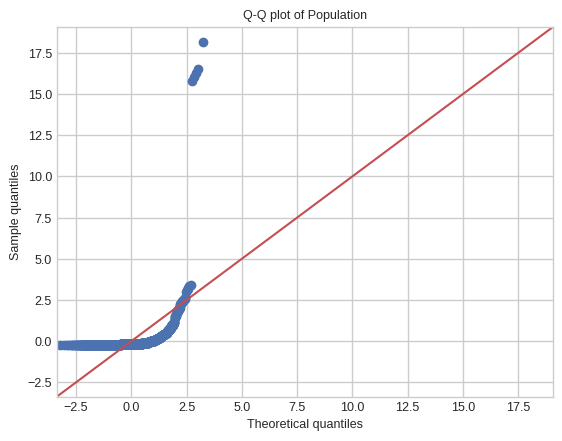

<Figure size 400x300 with 0 Axes>

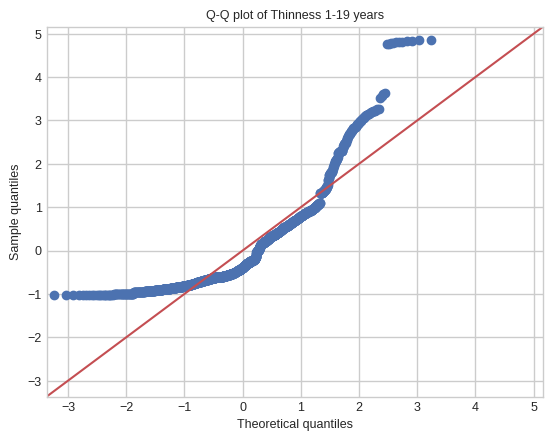

<Figure size 400x300 with 0 Axes>

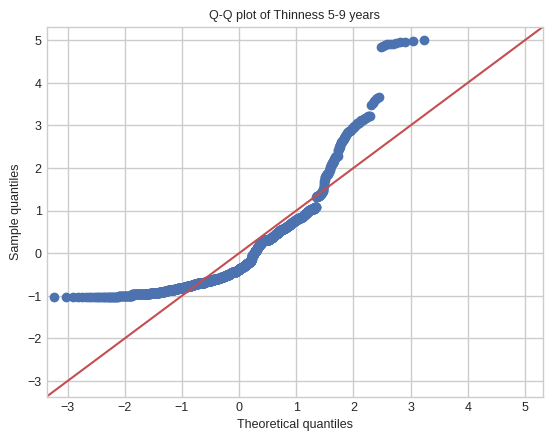

<Figure size 400x300 with 0 Axes>

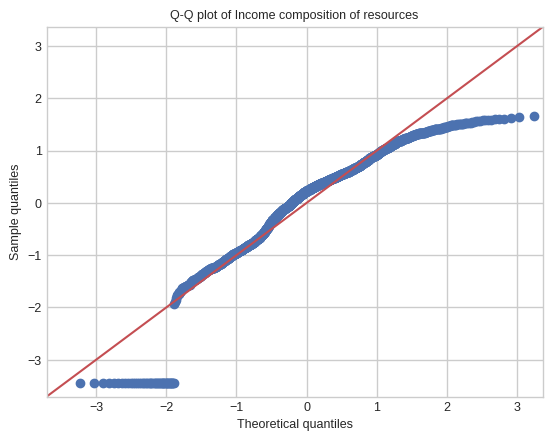

<Figure size 400x300 with 0 Axes>

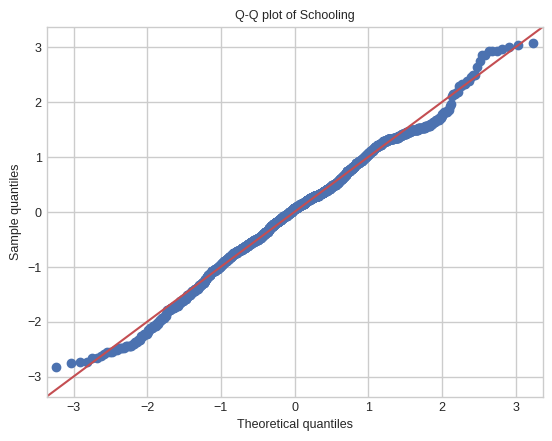

In [93]:
from statsmodels.graphics.gofplots import qqplot
df_norm=df[['Year', 'Life expectancy', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

for c in df_norm.columns[:]:
  plt.figure(figsize=(4,3))
  fig=qqplot(df_norm[c],line='45',fit='True')
  plt.xticks(fontsize=9)
  plt.yticks(fontsize=9)
  plt.xlabel("Theoretical quantiles",fontsize=9)
  plt.ylabel("Sample quantiles",fontsize=9)
  plt.title("Q-Q plot of {}".format(c),fontsize=9)
  plt.grid(True)
  plt.show()

We can notice in the above Q-Q plot that the independent variables are roughly following the normal distribution.

We can also notice a few outliers clearly in this plot.

### **4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**



Method 1: Correlation Analysis

In [94]:
df.corr()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Country,1.000000,-0.018344,0.079464,-0.112797,0.096978,-0.026246,-0.107650,-0.122095,0.013179,-0.035006,...,0.011280,-0.021885,-0.036725,0.149061,-0.118019,-0.018489,-0.023566,0.009962,-0.080718,-0.055855
Year,-0.018344,1.000000,0.034138,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,...,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Status,0.079464,0.034138,1.000000,-0.442798,0.278173,0.108757,-0.607782,-0.461688,-0.140351,0.071963,...,-0.201917,-0.192538,-0.201654,0.129555,-0.484801,0.034790,0.308005,0.307279,-0.463615,-0.512543
Life expectancy,-0.112797,0.050771,-0.442798,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,...,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,0.096978,-0.037092,0.278173,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,...,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
Infant deaths,-0.026246,0.008029,0.108757,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,...,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.107650,-0.113365,-0.607782,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,...,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
Percentage expenditure,-0.122095,0.069553,-0.461688,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,...,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.013179,0.114897,-0.140351,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,...,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.035006,-0.053822,0.071963,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,...,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660


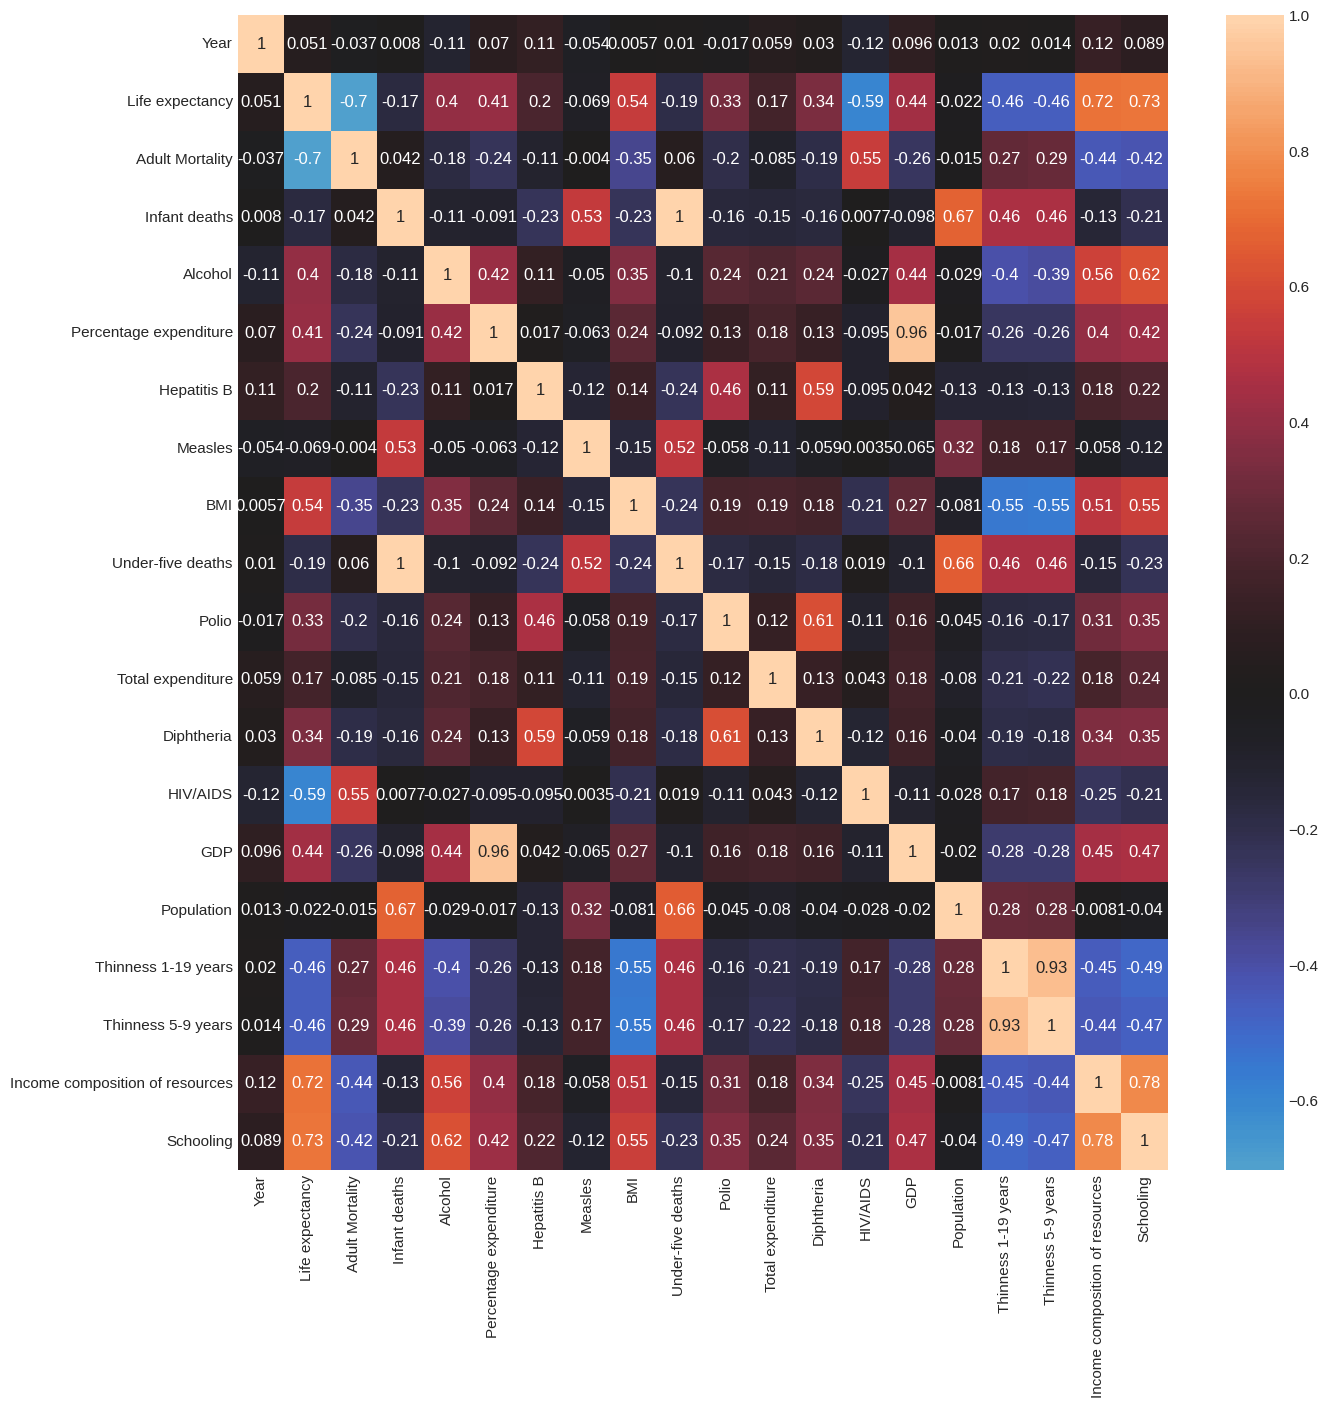

In [95]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df[numerical_col].corr(), annot=True,center=0)

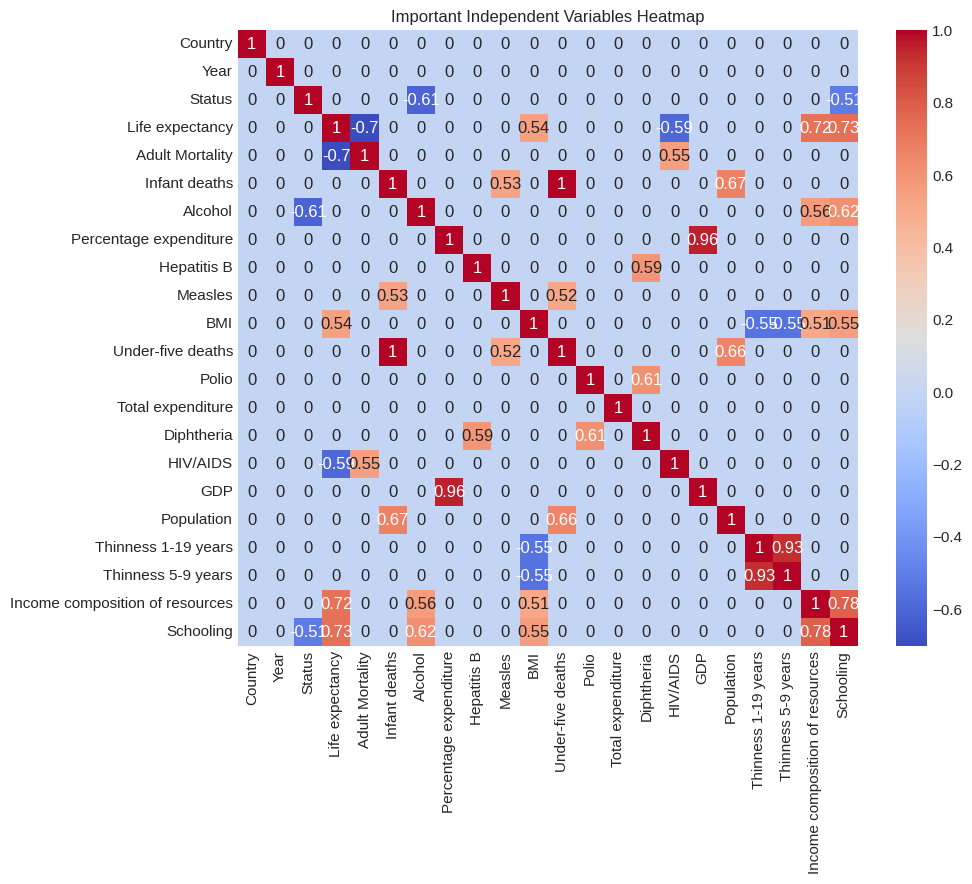

In [96]:
correlation_matrix = df.corr()

# Setting a threshold for correlation strength
correlation_threshold = 0.5

# Filtering out the important independent variables
important_variables = correlation_matrix[abs(correlation_matrix) >= correlation_threshold].fillna(0)

# Creating a heatmap to visualize the relationships
plt.figure(figsize=(10, 8))
sns.heatmap(important_variables, annot=True, cmap='coolwarm')
plt.title('Important Independent Variables Heatmap')
plt.show()

Variables with high positive or negative correlation are likely useful for predicting life expectancy in a regression model.

The correlation close to 1 indicates that it is strongly correlated, and the values closer to 0 are a weak correlation

This narrows down the list of possible predictors to start with for modeling.

Method 2: Feature Selection

In [97]:
!pip install eli5

In [98]:
from sklearn.model_selection import train_test_split

X = df[['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [99]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Creating linear regression object
regr = linear_model.LinearRegression()

# Training the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [100]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.3813 ± 0.0375,Under-five deaths
0.3004 ± 0.0411,HIV/AIDS
0.2782 ± 0.0492,Infant deaths
0.1775 ± 0.0361,Schooling
0.1081 ± 0.0168,Adult Mortality
0.0782 ± 0.0288,Income composition of resources
0.0102 ± 0.0064,BMI
0.0075 ± 0.0076,Year
0.0051 ± 0.0038,Alcohol
0.0033 ± 0.0035,Percentage expenditure


Eli5 clearly shows us the features that are necessary for the prediction of the target variable: Life Expectancy.

Method 3: OLS

In [101]:
import statsmodels.api as sm

# X is my feature matrix and y is my target variable
X = df[['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]  # Specify the features
X = sm.add_constant(X)  # Add a constant (intercept) term
y = df['Life expectancy']
df.dropna(inplace=True)
model = sm.OLS(y, X).fit()

# Getting summary statistics of the OLS model
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     443.1
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:55:31   Log-Likelihood:                -4424.8
No. Observations:                1649   AIC:                             8890.
Df Residuals:                    1629   BIC:                             8998.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [102]:
# Defining the independent variables (features) and the dependent variable
X = df[['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]  # Include all your independent variables
y = df['Life expectancy']  # Replace with the name of your dependent variable

# Geting the summary of the regression model
summary = model.summary()

# Extracting p-values for each independent variable using integer indices
p_values = model.pvalues[1:]  # Exclude the constant term (intercept)

# Setting a significance level (e.g., 0.05) for feature selection.
# Variables with p-values less than or equal to this significance level are considered significant.
significance_level = 0.05

# Filtering out important independent variables based on p-values
important_vars = [var for var, p_value in zip(X.columns, p_values) if p_value < significance_level]

# Printing the important variables
print("Important Independent Variables:")
print(important_vars)


Important Independent Variables:
['Year', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'BMI', 'Under-five deaths', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling']


###**5. Which independent variables have missing data? How much?**



None of the independent variables have missing values.

### **6. Do the training and test sets have the same data?**



In [103]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (e.g., 80% training, 20% test)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [104]:
train_data.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,...,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1.319000e+03,1319.000000,1319.000000,1319.000000,1319.000000
mean,66.909780,2007.816528,0.855951,69.147612,169.106899,32.276725,4.514541,729.084636,78.786202,2223.243366,...,83.011372,5.959689,84.120546,2.069901,5668.715438,1.407671e+07,4.871114,4.933965,0.627404,12.103412
std,38.955679,4.063756,0.351272,8.880174,128.257849,116.312664,4.054815,1853.239088,25.636891,10350.362798,...,22.723495,2.339563,21.041145,6.245955,11971.059185,6.197714e+07,4.607010,4.663834,0.187310,2.812652
min,0.000000,2000.000000,0.000000,44.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,...,3.000000,0.740000,4.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.400000
25%,34.000000,2005.000000,1.000000,64.300000,75.500000,1.000000,0.680000,36.025767,73.000000,0.000000,...,78.000000,4.385000,81.000000,0.100000,458.876265,2.232995e+05,1.600000,1.600000,0.504000,10.300000
50%,68.000000,2008.000000,1.000000,71.400000,152.000000,3.000000,3.750000,140.377136,89.000000,17.000000,...,92.000000,5.850000,92.000000,0.100000,1536.156850,1.446754e+06,3.100000,3.300000,0.668000,12.300000
75%,100.000000,2011.000000,1.000000,74.850000,228.500000,23.000000,7.380000,510.768109,96.000000,419.000000,...,97.000000,7.530000,97.000000,0.800000,4682.028192,8.146694e+06,7.100000,7.100000,0.751000,13.900000
max,132.000000,2015.000000,1.000000,89.000000,723.000000,1500.000000,17.870000,18961.348600,99.000000,131441.000000,...,99.000000,14.390000,99.000000,50.600000,119172.741800,1.179681e+09,27.200000,28.100000,0.936000,20.700000


In [105]:
test_data.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,3.300000e+02,330.000000,330.000000,330.000000,330.000000
mean,63.330303,2007.936364,0.842424,69.920606,164.651515,33.657576,4.607758,578.620492,80.942424,2229.493939,...,85.775758,5.940879,84.293939,1.640000,5155.608846,1.695954e+07,4.768788,4.803030,0.648127,12.185758
std,38.562269,4.186991,0.364896,8.440282,112.873641,137.677416,3.930246,1313.635198,25.441028,8965.113664,...,21.214021,2.134551,23.641477,5.083836,9239.852266,9.733408e+07,4.574034,4.618806,0.164362,2.728485
min,0.000000,2000.000000,0.000000,44.000000,1.000000,0.000000,0.010000,0.796916,2.000000,0.000000,...,6.000000,1.100000,2.000000,0.100000,11.147277,3.600000e+01,0.100000,0.100000,0.000000,4.200000
25%,29.250000,2004.000000,1.000000,65.575000,83.000000,0.000000,1.105000,42.102815,79.000000,0.000000,...,85.000000,4.520000,84.000000,0.100000,480.021665,1.347335e+05,1.800000,1.800000,0.536750,10.600000
50%,63.000000,2008.500000,1.000000,72.400000,146.000000,3.000000,3.940000,152.888463,91.000000,10.000000,...,94.000000,5.800000,94.000000,0.100000,1720.754636,1.203044e+06,2.800000,2.950000,0.692500,12.400000
75%,96.750000,2011.000000,1.000000,75.275000,221.000000,20.750000,7.255000,502.678105,96.000000,260.500000,...,98.000000,7.340000,97.000000,0.575000,5367.307676,6.090736e+06,6.950000,6.975000,0.751500,14.200000
max,132.000000,2014.000000,1.000000,89.000000,647.000000,1600.000000,16.350000,10111.389280,99.000000,88962.000000,...,99.000000,11.930000,99.000000,46.400000,65445.885300,1.293859e+09,27.200000,28.200000,0.921000,18.600000


The data in both sets are not identical but the distribution is same.

There is very little or no difference between the means of both datasets, concluding that there is not much of a difference in the average value of the data points between the two datasets.

Although we can notice a difference between the STD values between the two datasets. It suggests that there is a difference in the variability or spread of data points between the two datasets.


### **7. In the predictor variables independent of all the other predictor variables?**

In [106]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Defining the predictor variables (independent variables)
X = df[numerical_col]

# Adding a constant term (intercept) to the predictors
X = sm.add_constant(X)

# Calculating the VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif["VIF"] = vif["VIF"].round(3)
# Displaying the VIF values
print(vif)

                           Variable         VIF
0                             const  285946.750
1                              Year       1.180
2                   Life expectancy       6.168
3                   Adult Mortality       2.147
4                     Infant deaths     222.791
5                           Alcohol       2.080
6            Percentage expenditure      12.928
7                       Hepatitis B       1.681
8                           Measles       1.518
9                               BMI       1.834
10                Under-five deaths     212.987
11                            Polio       1.724
12                Total expenditure       1.128
13                       Diphtheria       2.101
14                         HIV/AIDS       2.087
15                              GDP      13.659
16                       Population       1.944
17              Thinness 1-19 years       7.606
18               Thinness 5-9 years       7.590
19  Income composition of resources     

It prints out the VIF values, and we can inspect them to identify variables with high multicollinearity (typically VIF values greater than 5 or 10 are considered high)

### **8. Which Predictor variables are the most important?**


In [107]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist(), top=7)

From the above given features, the top 6 are the most important predictor variables with the 'Under-five deaths' being the variable which has the highest impact on predicting 'Life expectations'.

### **9. Do the ranges of the predictor variables make sense?**

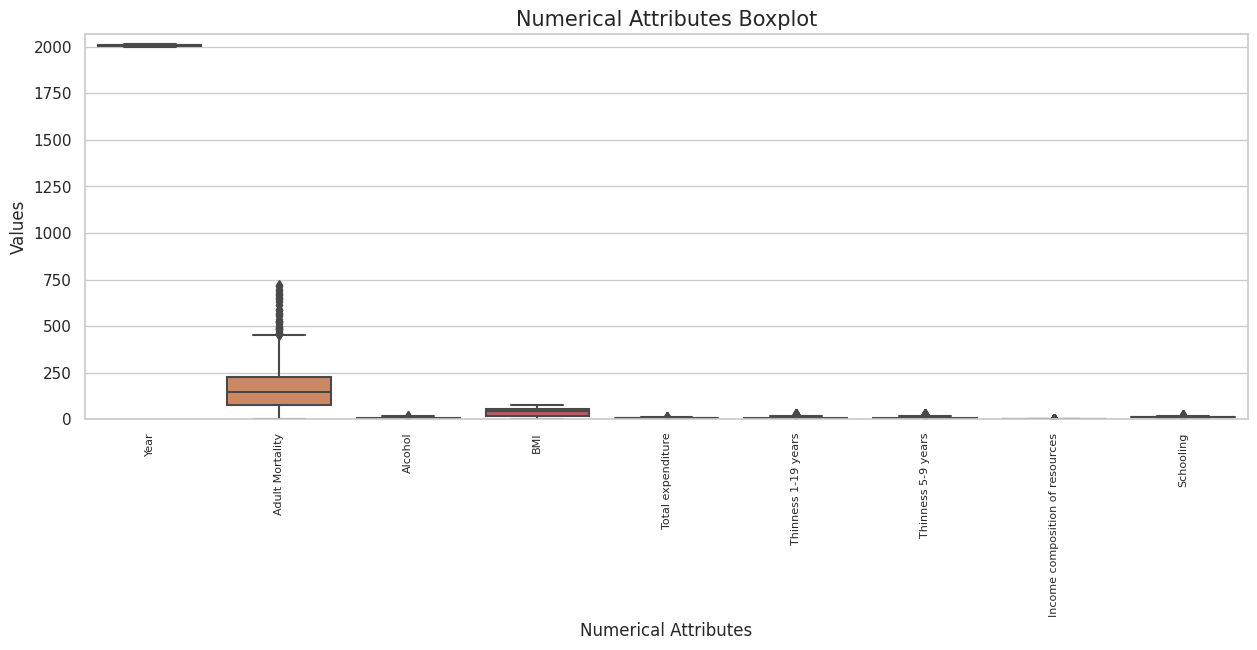

In [108]:
#Plotting the boxplot of all independent variables that are important for prediction
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df[['Year',  'Adult Mortality',
       'Alcohol', 'BMI',
        'Total expenditure',
         'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']])
plt.ylim(0, 2067) # set y-axis range

labels = ['Year',  'Adult Mortality',
       'Alcohol', 'BMI',
        'Total expenditure',
        'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
plt.xticks(range(len(labels)), labels, rotation=90, fontsize=8)


plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

With the help of a boxplot we are able to view many outliers for independent variables which defines that the ranges of the predictor variables does makes sense.

For a predictive model, the ranges are varying which might not be ideal. For the same, we can continue scaling.



### **10. What are the distributions of the predictor variables?**

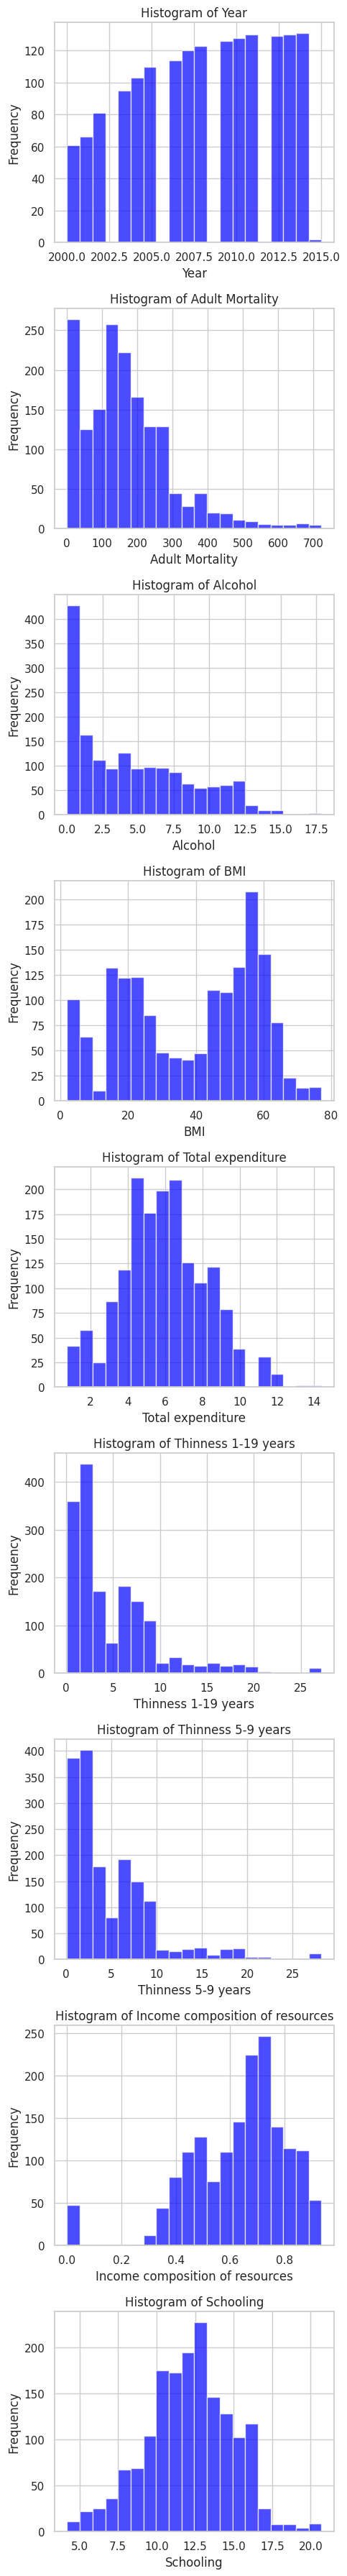

In [109]:
import matplotlib.pyplot as plt

# 'df' is my DataFrame and 'column_names' is a list of column names that I want to plot
column_names = ['Year',  'Adult Mortality','Alcohol', 'BMI','Total expenditure', 'Thinness 1-19 years','Thinness 5-9 years',
                'Income composition of resources', 'Schooling']

# Setting the number of bins for the histograms
num_bins = 20

# Creating subplots for each variable
fig, axes = plt.subplots(nrows=len(column_names), ncols=1, figsize=(5, 4 * len(column_names)))

# Looping through each variable and creating a histogram
for i, column in enumerate(column_names):
    ax = axes[i]

    # Plotting the histogram
    ax.hist(df[column], bins=num_bins, color='blue', alpha=0.7)

    # Setting labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjusting spaces between subplots
plt.tight_layout()

# Showing the plots
plt.show()

### **11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [110]:
# Splitting the data into training and test sets (80% training, 20% test)
# Splitting the data into features (X) and the target variable (y)
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Before removing outliers:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Before removing outliers:
Mean Squared Error (MSE): 70.51293090909091
R-squared (R2): 0.007174538821146603


In [112]:
#Removing the outliers
z_score_threshold = 3
data = df.copy()
for column in data.select_dtypes(include=[np.number]).columns:
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    data = data[z_scores <= z_score_threshold]

#data now contains the DataFrame with outliers removed

X = data.drop(columns=['Life expectancy'])
y = data['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"After removing the outliers")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

After removing the outliers
Mean Squared Error (MSE): 62.98952274678113
R-squared (R2): -0.0678378678744831


Here we notice that the values of MSE and R-squared reduced after we removed the outliers.

### **12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data, and check for bias and variance of the error**

In [114]:
#copying the data in 'Schooling' column into different sub columns for removing the data
data_schooling = data[['Schooling']]
data_schooling['schooling_copy_1_percent'] = data[['Schooling']]
data_schooling['schooling_copy_5_percent'] = data[['Schooling']]
data_schooling['schooling_copy_10_percent'] = data[['Schooling']]
data_schooling

<ipython-input-114-894fbf405845>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_schooling['schooling_copy_1_percent'] = data[['Schooling']]
<ipython-input-114-894fbf405845>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_schooling['schooling_copy_5_percent'] = data[['Schooling']]
<ipython-input-114-894fbf405845>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,Schooling,schooling_copy_1_percent,schooling_copy_5_percent,schooling_copy_10_percent
14,5.9,5.9,5.9,5.9
16,14.2,14.2,14.2,14.2
17,14.2,14.2,14.2,14.2
18,14.2,14.2,14.2,14.2
19,14.2,14.2,14.2,14.2
...,...,...,...,...
1629,11.6,11.6,11.6,11.6
1634,10.3,10.3,10.3,10.3
1635,10.4,10.4,10.4,10.4
1636,9.8,9.8,9.8,9.8


In [115]:
#defining a function to get the missing data from the columns
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_data = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

In [116]:
get_percent_missing(data_schooling)


,column_name,percent_missing
Schooling,Schooling,0.0
schooling_copy_1_percent,schooling_copy_1_percent,0.0
schooling_copy_5_percent,schooling_copy_5_percent,0.0
schooling_copy_10_percent,schooling_copy_10_percent,0.0


In [117]:
#Creating missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [118]:
# Creating missing data in each col
create_missing(data_schooling, 0.01, 'schooling_copy_1_percent')
create_missing(data_schooling, 0.05, 'schooling_copy_5_percent')
create_missing(data_schooling, 0.1, 'schooling_copy_10_percent')

<ipython-input-117-4dd58bc75723>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [119]:
get_percent_missing(data_schooling)

,column_name,percent_missing
Schooling,Schooling,0.000000
schooling_copy_1_percent,schooling_copy_1_percent,1.032702
schooling_copy_5_percent,schooling_copy_5_percent,4.991394
schooling_copy_10_percent,schooling_copy_10_percent,9.982788


In [120]:
# Storing the indices of missing rows
schooling_1_idx = list(np.where(data_schooling['schooling_copy_1_percent'].isna())[0])
schooling_5_idx = list(np.where(data_schooling['schooling_copy_5_percent'].isna())[0])
schooling_10_idx = list(np.where(data_schooling['schooling_copy_10_percent'].isna())[0])

In [121]:
print(f"The length of schooling 1 index is {len(schooling_1_idx)} and contains {(len(schooling_1_idx)/len(data_schooling['schooling_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_schooling['schooling_copy_1_percent'])}")
print(f"The length of schooling 5 index is {len(schooling_5_idx)} and contains {(len(schooling_5_idx)/len(data_schooling['schooling_copy_5_percent']))*100}% of the total data in the column | Total rows: {len(data_schooling['schooling_copy_5_percent'])}")
print(f"The length of schooling 10 index is {len(schooling_10_idx)} and contains {(len(schooling_10_idx)/len(data_schooling['schooling_copy_10_percent']))*100}% of the total data in the column | Total rows: {len(data_schooling['schooling_copy_10_percent'])}")


The length of schooling 1 index is 12 and contains 1.0327022375215147% of the total data in the column | Total rows: 1162
The length of schooling 5 index is 58 and contains 4.991394148020654% of the total data in the column | Total rows: 1162
The length of schooling 10 index is 116 and contains 9.982788296041308% of the total data in the column | Total rows: 1162


In [122]:
#Finding out the missing values present after removing the data
data_schooling.isnull().sum()

Schooling                      0
schooling_copy_1_percent      12
schooling_copy_5_percent      58
schooling_copy_10_percent    116
dtype: int64

Method 1: KNN imputer

In [123]:
#Perfomring scaling before KNN imputation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_schooling = pd.DataFrame(scaler.fit_transform(data_schooling))
data_schooling.head()

#Knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_schooling = pd.DataFrame(imputer.fit_transform(data_schooling))

#Checking missing values
data_schooling.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [124]:
#Calculating the average difference between the actual values and the imputed values
print('The variance in 1% imputation column is: ', data_schooling[0].mean() - data_schooling[1].mean())
print('The variance in 5% imputation column is: ', data_schooling[0].mean() - data_schooling[2].mean())
print('The variance in 10% imputation column is: ', data_schooling[0].mean() - data_schooling[3].mean())

The variance in 1% imputation column is:  1.8388572605165798e-06
The variance in 5% imputation column is:  0.0
The variance in 10% imputation column is:  1.1033143563266012e-05


Method 2: Mean Imputation

In [125]:
data_schooling = data[['Schooling']]
data_schooling['schooling_copy_1_percent'] = df[['Schooling']]
data_schooling['schooling_copy_5_percent'] = df[['Schooling']]
data_schooling['schooling_copy_10_percent'] = df[['Schooling']]
data_schooling

def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_data = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

get_percent_missing(data_schooling)

#Creating missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Creating missing data in each col
create_missing(data_schooling, 0.01, 'schooling_copy_1_percent')
create_missing(data_schooling, 0.05, 'schooling_copy_5_percent')
create_missing(data_schooling, 0.1, 'schooling_copy_10_percent')

get_percent_missing(data_schooling)

# Storing the indices of missing rows
schooling_1_idx = list(np.where(data_schooling['schooling_copy_1_percent'].isna())[0])
schooling_5_idx = list(np.where(data_schooling['schooling_copy_5_percent'].isna())[0])
schooling_10_idx = list(np.where(data_schooling['schooling_copy_10_percent'].isna())[0])

print(f"The length of schooling 1 index is {len(schooling_1_idx)} and contains {(len(schooling_1_idx)/len(data_schooling['schooling_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_schooling['schooling_copy_1_percent'])}")
print(f"The length of schooling 5 index is {len(schooling_5_idx)} and contains {(len(schooling_5_idx)/len(data_schooling['schooling_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_schooling['schooling_copy_1_percent'])}")
print(f"The length of schooling 10 index is {len(schooling_10_idx)} and contains {(len(schooling_10_idx)/len(data_schooling['schooling_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_schooling['schooling_copy_1_percent'])}")

data_schooling.isnull().sum()


The length of schooling 1 index is 12 and contains 1.0327022375215147% of the total data in the column | Total rows: 1162
The length of schooling 5 index is 58 and contains 4.991394148020654% of the total data in the column | Total rows: 1162
The length of schooling 10 index is 116 and contains 9.982788296041308% of the total data in the column | Total rows: 1162


<ipython-input-125-91d327b492da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_schooling['schooling_copy_1_percent'] = df[['Schooling']]
<ipython-input-125-91d327b492da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_schooling['schooling_copy_5_percent'] = df[['Schooling']]
<ipython-input-125-91d327b492da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Schooling                      0
schooling_copy_1_percent      12
schooling_copy_5_percent      58
schooling_copy_10_percent    116
dtype: int64

In [126]:
#Applying mean to all the columns where data is missing
data_schooling['schooling_copy_1_percent'] = data_schooling['schooling_copy_1_percent'].fillna(data_schooling['schooling_copy_1_percent'].mean())
data_schooling['schooling_copy_5_percent'] = data_schooling['schooling_copy_5_percent'].fillna(data_schooling['schooling_copy_5_percent'].mean())
data_schooling['schooling_copy_10_percent'] = data_schooling['schooling_copy_10_percent'].fillna(data_schooling['schooling_copy_10_percent'].mean())
data_schooling.isnull().sum()

<ipython-input-126-7a45aeabefbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_schooling['schooling_copy_1_percent'] = data_schooling['schooling_copy_1_percent'].fillna(data_schooling['schooling_copy_1_percent'].mean())
<ipython-input-126-7a45aeabefbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_schooling['schooling_copy_5_percent'] = data_schooling['schooling_copy_5_percent'].fillna(data_schooling['schooling_copy_5_percent'].mean())
<ipython-input-126-7a45aeabefbc>:4: SettingWithCopyWarni

Schooling                    0
schooling_copy_1_percent     0
schooling_copy_5_percent     0
schooling_copy_10_percent    0
dtype: int64

In [127]:
#Calculating average difference between the actual values and the imputed values
print('The variance in 1% imputation column is: ', data_schooling['Schooling'].mean() - data_schooling['schooling_copy_1_percent'].mean())
print('The variance in 5% imputation column is: ', data_schooling['Schooling'].mean() - data_schooling['schooling_copy_5_percent'].mean())
print('The variance in 10% imputation column is: ', data_schooling['Schooling'].mean() - data_schooling['schooling_copy_10_percent'].mean())

The variance in 1% imputation column is:  -0.0055227119658773915
The variance in 5% imputation column is:  0.016397577889195603
The variance in 10% imputation column is:  0.04665951432059856


Method 3: Mice Algorithm

In [128]:
data_schooling = data[['Schooling']]
data_schooling['schooling_copy_1_percent'] = data[['Schooling']]
data_schooling['schooling_copy_5_percent'] = data[['Schooling']]
data_schooling['schooling_copy_10_percent'] = data[['Schooling']]
data_schooling

def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_data = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_data

get_percent_missing(data_schooling)

#Creating missing helper fn
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

# Creating missing data in each col
create_missing(data_schooling, 0.01, 'schooling_copy_1_percent')
create_missing(data_schooling, 0.05, 'schooling_copy_5_percent')
create_missing(data_schooling, 0.1, 'schooling_copy_10_percent')

get_percent_missing(data_schooling)

# Storing the indices of missing rows
schooling_1_idx = list(np.where(data_schooling['schooling_copy_1_percent'].isna())[0])
schooling_5_idx = list(np.where(data_schooling['schooling_copy_5_percent'].isna())[0])
schooling_10_idx = list(np.where(data_schooling['schooling_copy_10_percent'].isna())[0])

print(f"The length of schooling 1 index is {len(schooling_1_idx)} and contains {(len(schooling_1_idx)/len(data_schooling['schooling_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_schooling['schooling_copy_1_percent'])}")
print(f"The length of schooling 5 index is {len(schooling_5_idx)} and contains {(len(schooling_5_idx)/len(data_schooling['schooling_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_schooling['schooling_copy_1_percent'])}")
print(f"The length of schooling 10 index is {len(schooling_10_idx)} and contains {(len(schooling_10_idx)/len(data_schooling['schooling_copy_1_percent']))*100}% of the total data in the column | Total rows: {len(data_schooling['schooling_copy_1_percent'])}")

data_schooling.isnull().sum()

The length of schooling 1 index is 12 and contains 1.0327022375215147% of the total data in the column | Total rows: 1162
The length of schooling 5 index is 58 and contains 4.991394148020654% of the total data in the column | Total rows: 1162
The length of schooling 10 index is 116 and contains 9.982788296041308% of the total data in the column | Total rows: 1162


<ipython-input-128-71812022c4b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_schooling['schooling_copy_1_percent'] = data[['Schooling']]
<ipython-input-128-71812022c4b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_schooling['schooling_copy_5_percent'] = data[['Schooling']]
<ipython-input-128-71812022c4b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

Schooling                      0
schooling_copy_1_percent      12
schooling_copy_5_percent      58
schooling_copy_10_percent    116
dtype: int64

In [129]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data=imp.fit_transform(data)

#Checking for missing values
data_schooling.isnull().sum()
print('\n Values are successfully inserted with MICE Imputer.')

[IterativeImputer] Completing matrix with shape (1162, 22)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.08
[IterativeImputer] Change: 0.0, scaled tolerance: 84678.493 
[IterativeImputer] Early stopping criterion reached.

 Values are successfully inserted with MICE Imputer.


In [130]:
#Calculating average difference between the actual values and the imputed values
print('The variance in 1% imputation column is: ', data_schooling['Schooling'].mean() - data_schooling['schooling_copy_1_percent'].mean())
print('The variance in 5% imputation column is: ', data_schooling['Schooling'].mean() - data_schooling['schooling_copy_5_percent'].mean())
print('The variance in 10% imputation column is: ', data_schooling['Schooling'].mean() - data_schooling['schooling_copy_10_percent'].mean())

The variance in 1% imputation column is:  -0.0062183641397890455
The variance in 5% imputation column is:  0.03279250542542833
The variance in 10% imputation column is:  -0.010415055469076506


In [131]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### **For categorical data, calculate the accuracy and a confusion matrix.**

As my target variable is 'Life expectancy' which is a numerical column, I will not be able to calculate the accuracy and confusion matrix for the same.

No confusion matrix or accuracy calculation exists because these are relevant to classification problems with discrete class labels, not regression problems with continuous targets.

### **Building a Linear Regression model**

In [132]:
from sklearn.model_selection import train_test_split

X = df[['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy']

# Spliting data into Training 75%, Validation set 15% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [133]:
X_test_plot = X_test[['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

X_val_plot = X_val[['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

X_train_plot = X_train[['Year', 'Adult Mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

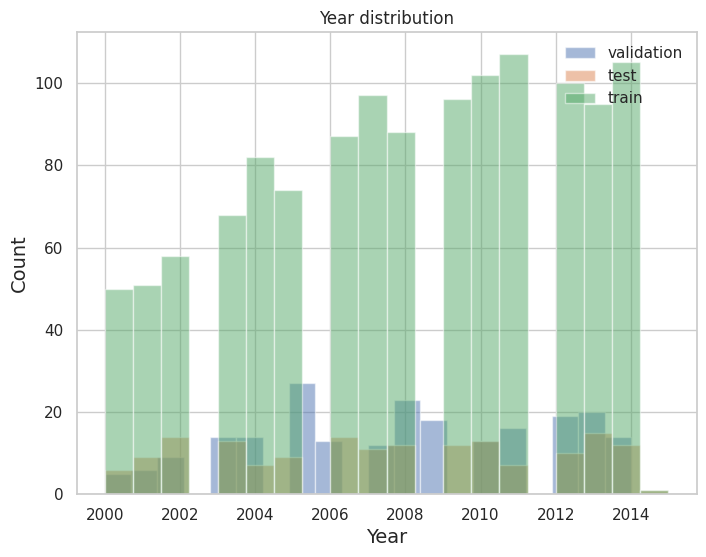

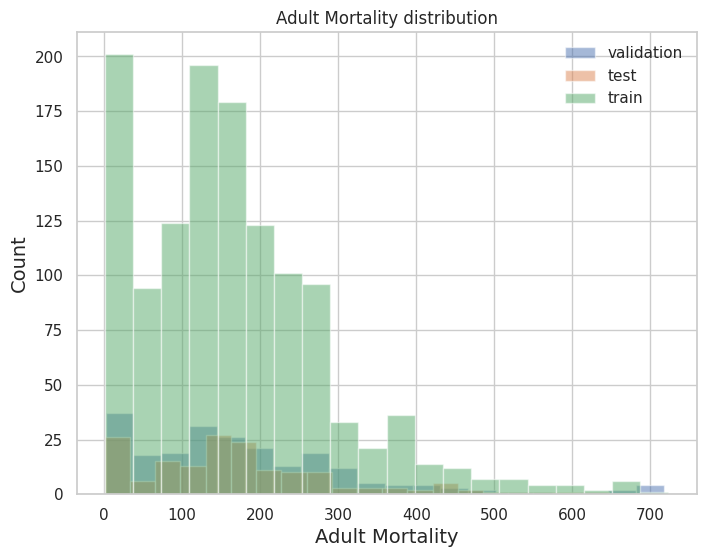

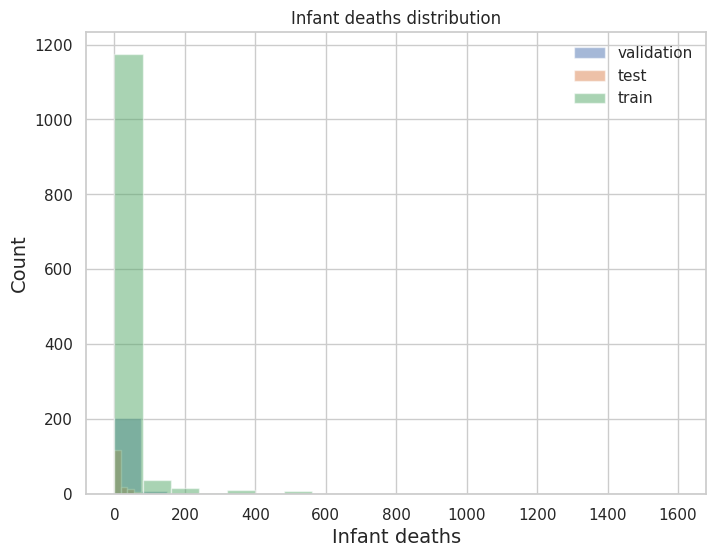

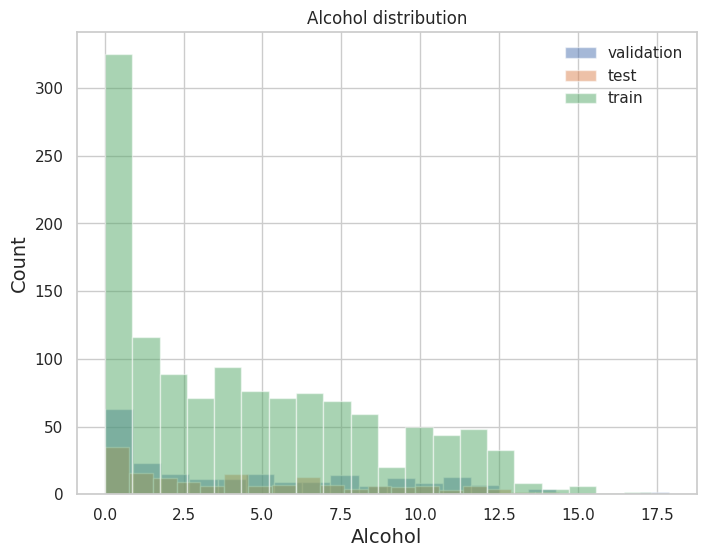

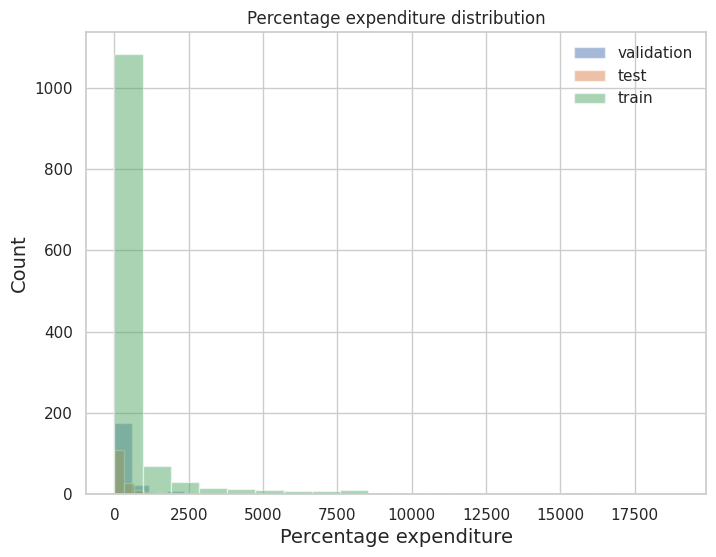

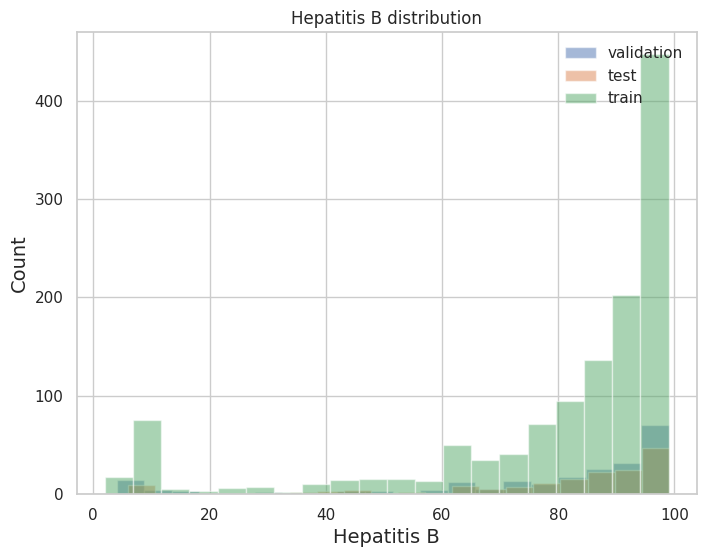

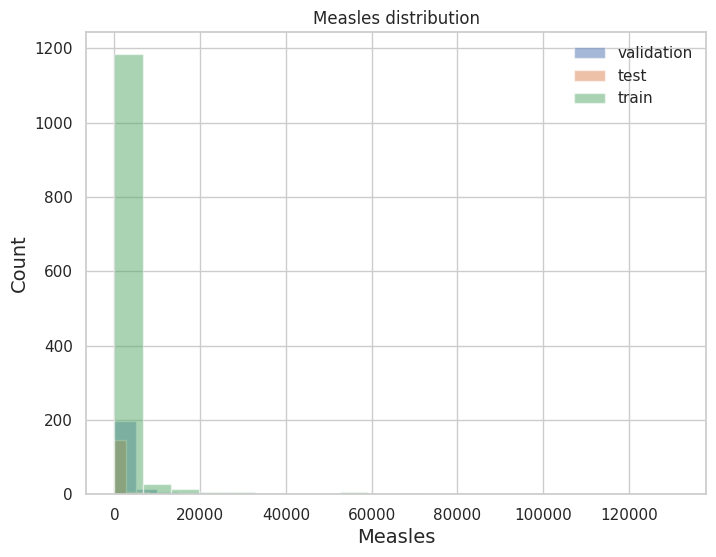

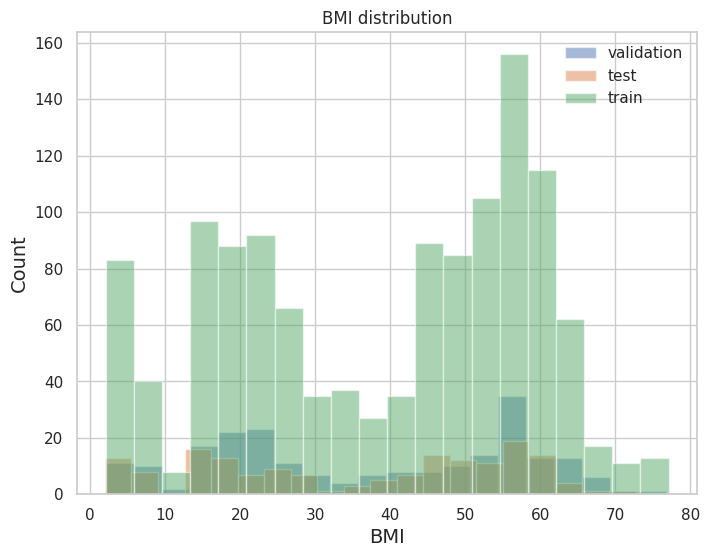

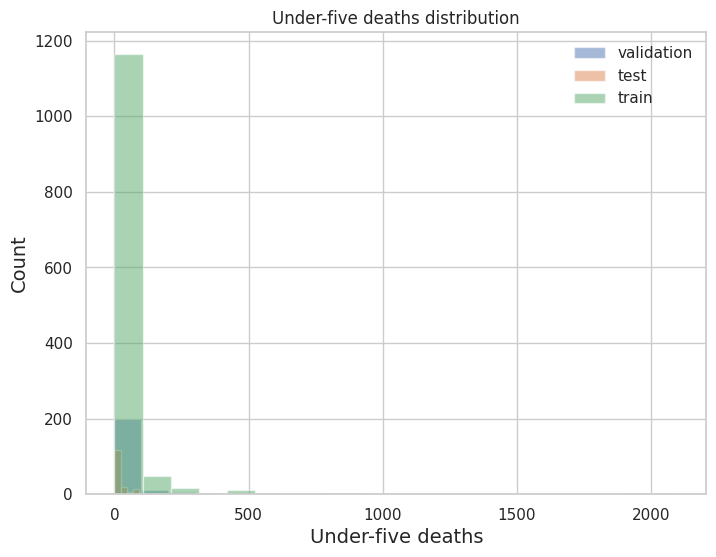

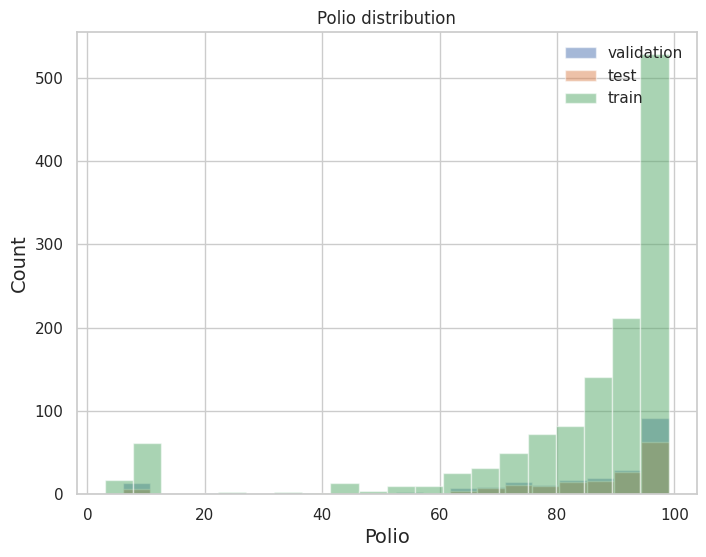

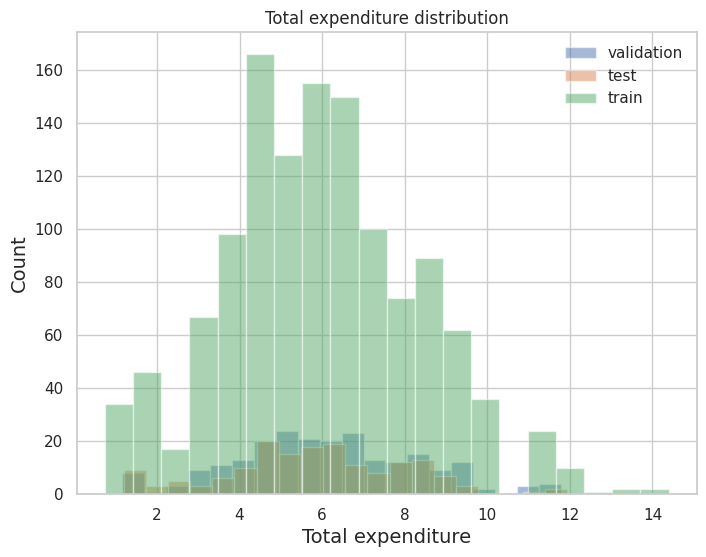

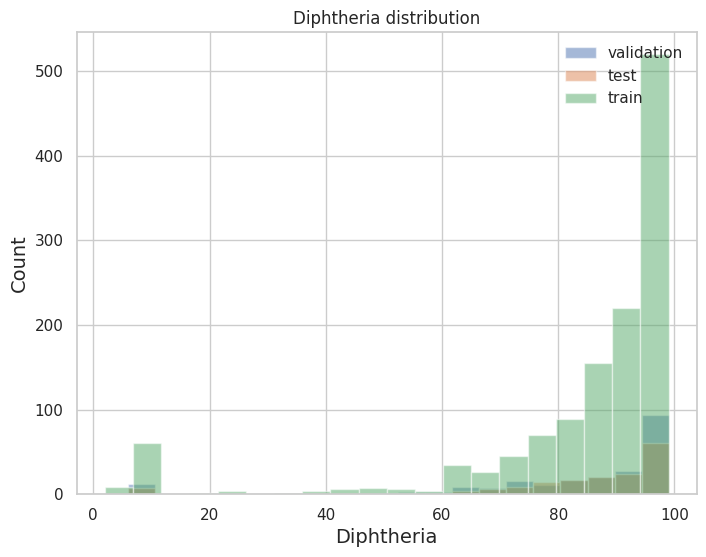

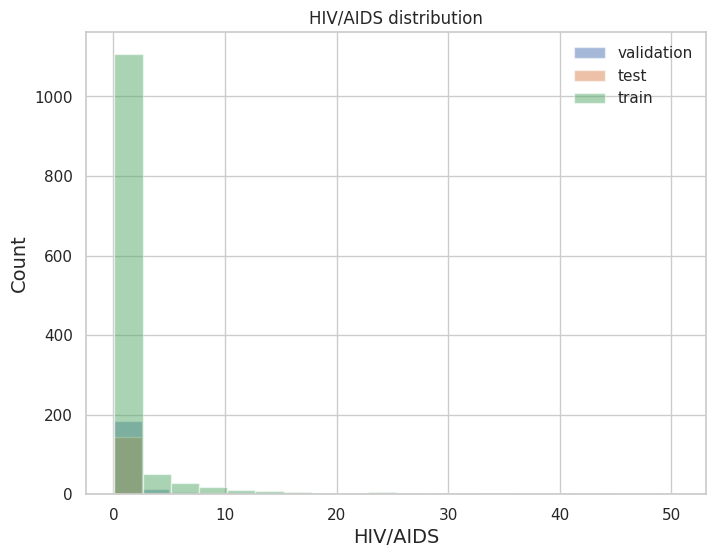

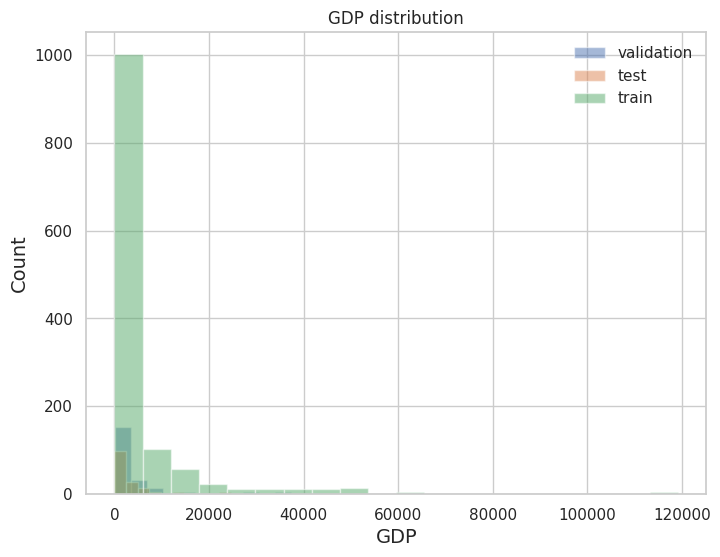

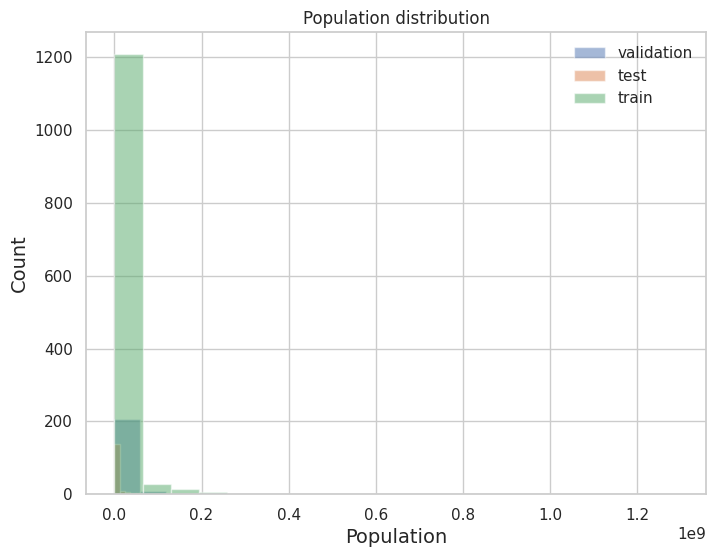

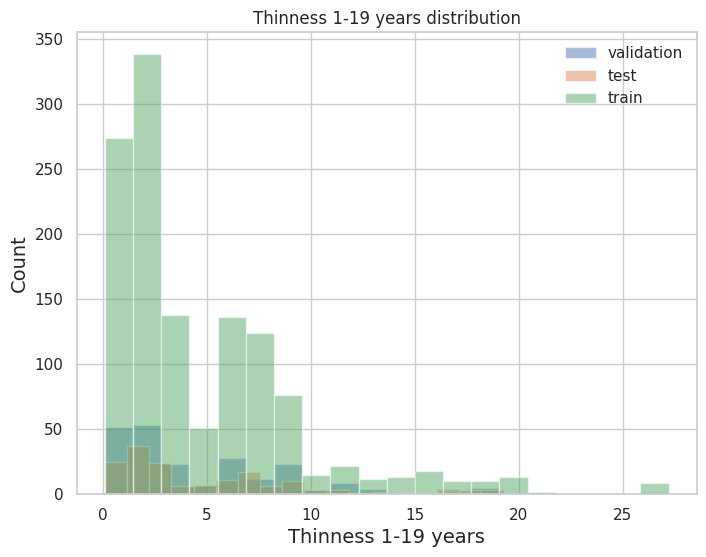

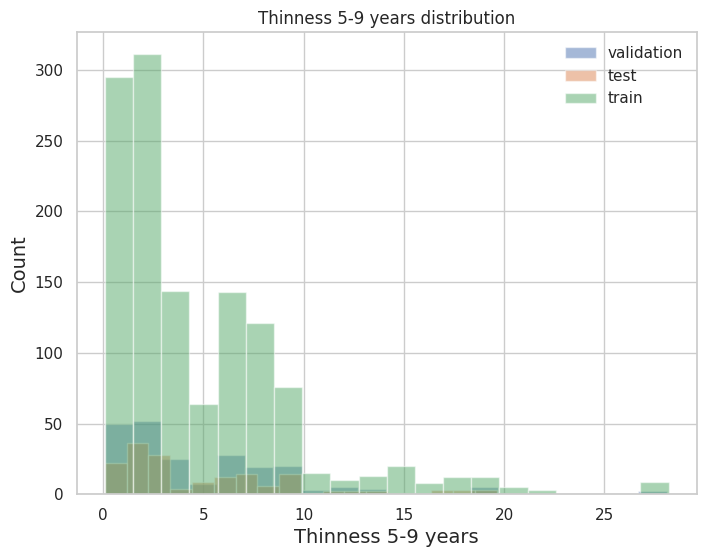

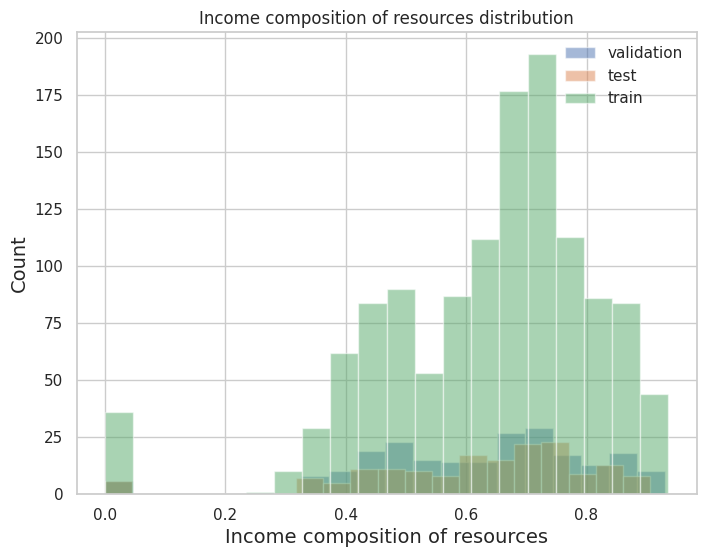

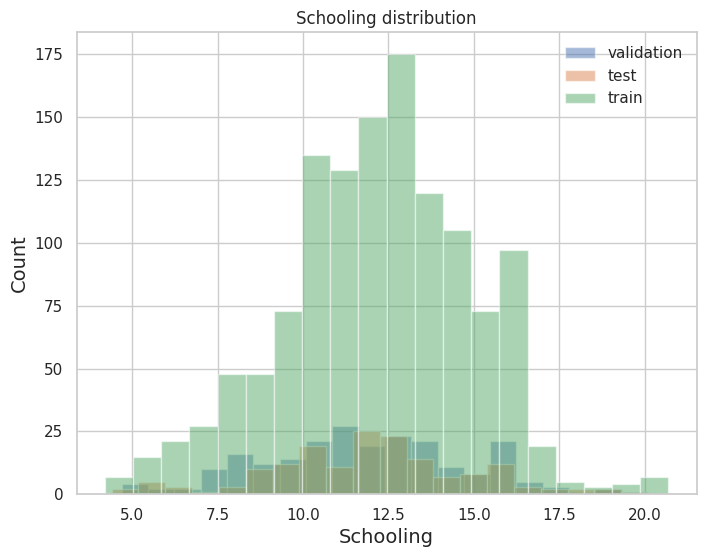

In [134]:
# Plotting the data to see the histogram distribution
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Making Predictions

In [135]:
# Making predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on training set =", r2)

Mean squared error: 12.63
Coefficient of determination: 0.83
R^2 score on training set = 0.8314412240038349


In [136]:
# Making predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 10.85
Coefficient of determination: 0.86
R^2 score on test set = 0.8643466337496379


In [137]:
# Making predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 13.69
Coefficient of determination: 0.84
R^2 score on validation set = 0.8437267839141365


## Answer the following questions:

**Which independent variables are useful to predict a target (dependent variable)?**

Ans: We used three methods to confirm the independent variables that had the most impact on predicting the target variable (Life Expectancy)

The said three methods were:
1. Correlation Matrix
2. Feature Selection using Eli5
3. The OLS method

The independent variables that have the most impact on the prediction are:
['Year', 'Adult Mortality', 'Infant deaths', 'Alcohol', 'BMI', 'Under-five deaths', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'Income composition of resources', 'Schooling']


**Which independent variable has missing data? How much?**

The dataset had 0 missing values, 0 null values, and 0 Nan values.

**Do the training and test sets have the same data?**

The training and test data are different, they will not have the same data.

The data is split in an 80:20 ratio as train and test data. However, it can be seen from above that the distribution of data remains the same.

The mean and standard deviation of the train and test data are nearly the same.

**In the predictor variables independent of all the other predictor variables?**

I have utilized the VIF method to determine the presence of multicollinearity among predictor variables in our regression analysis.

The Variance Inflation Factor (VIF) is a statistical tool that quantifies how much the variance of the estimated regression coefficients is increased due to multicollinearity.

VIF < 1:     No multicollinearity.
1 < VIF < 5: Moderate multicollinearity.
VIF >= 5:    High multicollinearity.

**Which predictor variables are the most important?**

Based on my analysis above, I can infer that the following predictor variables are the most important:

- Under-five deaths
- BMI
- HIV/AIDS
- Infant deaths
- Schooling
- Adult Mortality
- Income composition of resources

**Do the ranges of the predictor variables make sense?**

Variables of the given dataset have varying ranges.

Many numerical features have a normal distribution.

Outliers are present in features like 'Adult Mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Measles', 'BMI', 'Under-five deaths', 'Total expenditure','HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years', 'Thinness 5-9 years','Schooling'.

The categorical variables such as 'Country' and 'Status' have been correctly labeled and there are no missing values. However, a few variables, such as GDP and percentage expenditure, exhibit multicollinearity, which may impact the accuracy of the predictive models.

While the ranges of the variables generally make sense, having variables with different ranges can cause issues when building predictive models. This can affect the model's performance and stability, as well as the interpretation of the variable's importance. Scaling can help to resolve this issue and ensure that the model is performing optimally and interpreting the importance of variables correctly.

**What are the distributions of the predictor variables?**

From the histogram plot above, we can observe that some of the predictor variables follow the normal distribution curve while others exhibit right or left skewness.

## Conclusion:

I was able to analyze the dataset and get insights into the correlation between the different variables, the outliers detection, and the removal of the outliers, using a bunch of tools to conclude the findings.

## References:

- Sckit learn official documentation
- Official documentation - Eli5
- The algorithms were referred directly from the Sckit learn official documentation.
- https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/6105_ML_Data_Cleaning_and_Feature_Selection_Abalone_Example/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

The remaining code was written independently. Feature importance reference is taken from eli5 official documentation


## Liscence

Copyright 2023 akshitapathania7

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.